In [1]:
import numpy as np 
from scipy.optimize import *

import matplotlib.pyplot as plt
import seaborn as sns

from parameters import *
from models.game_theory_model import *
from models.game import *
from plot_function import *

sns.set_style('ticks',  {"axes.grid" : "True", "grid.color": ".4", "grid.linestyle": ":"})
sns.set_context('paper')
plt.rcParams.update({'mathtext.default':  'regular' })
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.labelsize']  =15
plt.rcParams['xtick.labelsize']  =13
plt.rcParams['legend.fontsize']  = 16
plt.rcParams['axes.labelsize' ] = 16
plt.rcParams['font.size'] = '16'
plt.rcParams['axes.titlesize'] = '16'

figsize = (8,5)

In [2]:
import pandas as pd

data = pd.read_csv('data/rcp_data.csv')
RCP_26 = data.loc[data['Scenario'] == 'RCP-2.6'].to_numpy()[0][8:] * co2_to_C**-1
RCP_85 = data.loc[data['Scenario'] == 'RCP-8.5'].to_numpy()[0][8:] * co2_to_C**-1
RCP_60 = data.loc[data['Scenario'] == 'RCP-6.0'].to_numpy()[0][8:] * co2_to_C**-1

temp_RCP26 = SCM.evaluate_trajectory(RCP_26)[-1]
temp_RCP85 = SCM.evaluate_trajectory(RCP_85)[-1]
temp_RCP60 = SCM.evaluate_trajectory(RCP_60)[-1]

In [3]:
C_1750

592.14

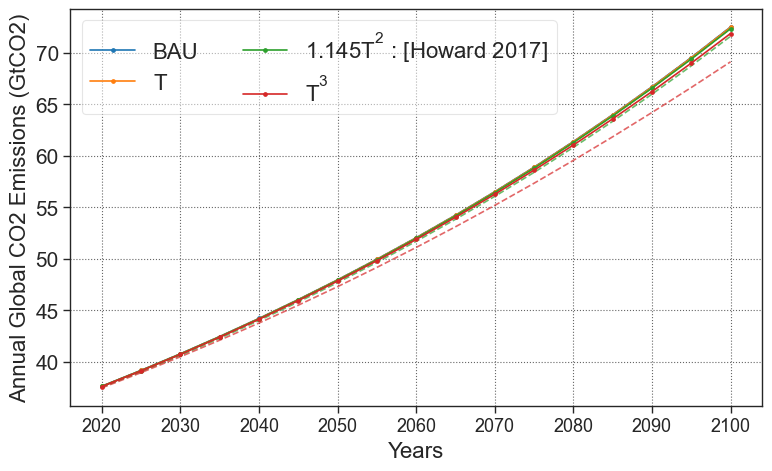

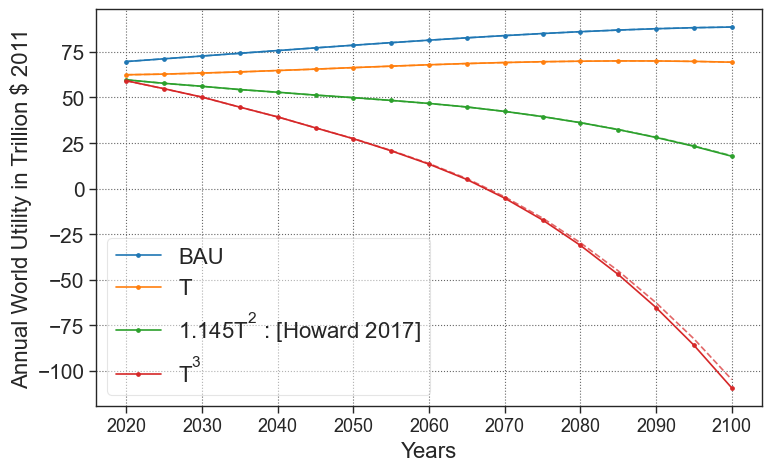

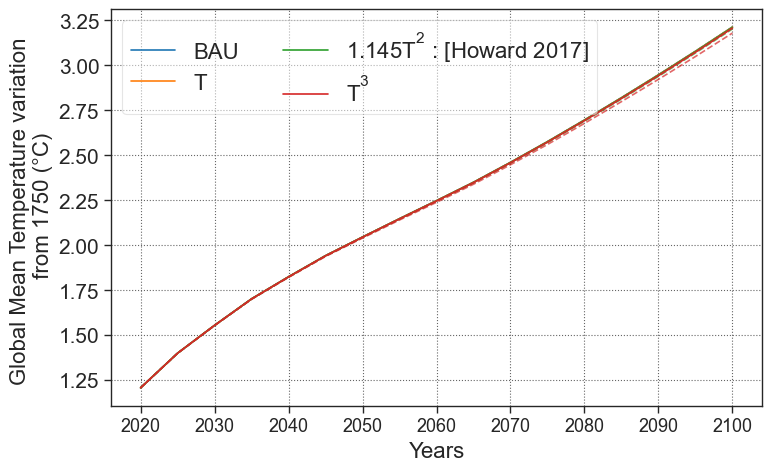

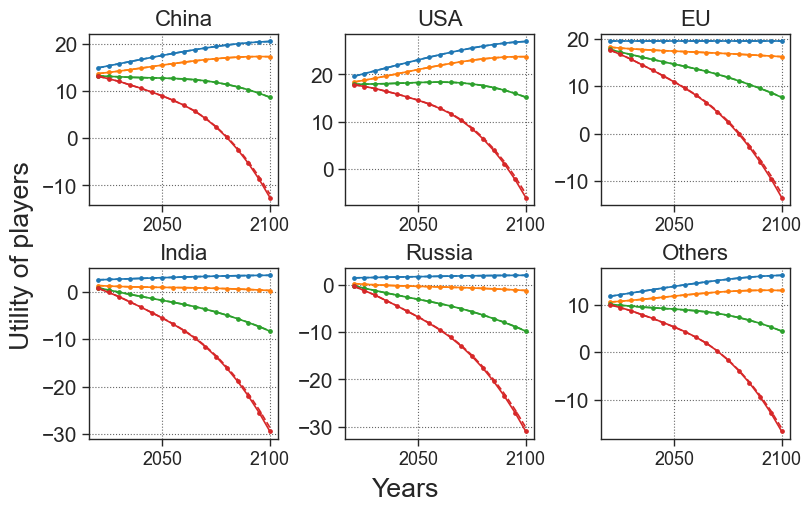

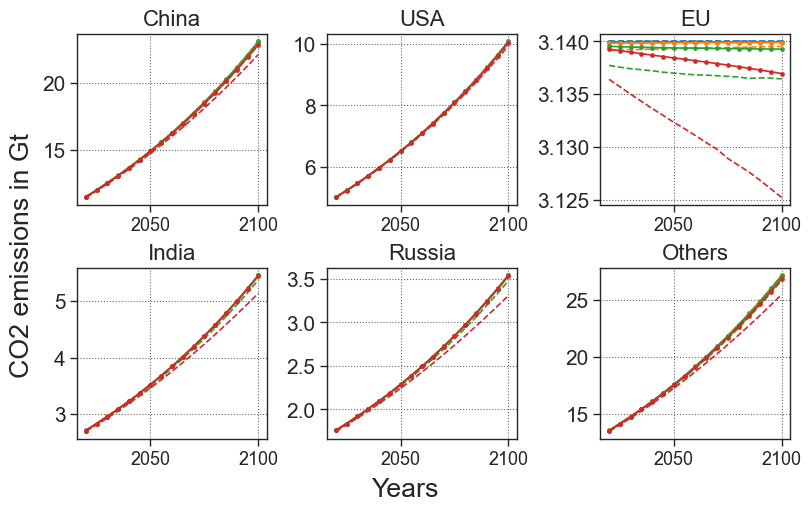

In [4]:
# puissance de la fonction damage 

# Coefficients de la fonction dammage (pour un polynome de degré 2)

list_damage_coef = [np.array([0]), np.array([0,1]), np.array([0,0,1.1450]), np.array([0,0,0,1])] #, np.array([0,0,0,0,1])]
list_damage_label = ['BAU', '$T$', '$1.145T^2$ : [Howard 2017]', '$T^3$'] #,  '$T^4$']

list_ne = []
list_ne_u = []
list_sum_action = []
list_sum_utilities = []
list_temp = []
list_so = []
list_so_u = []
list_sum_action_so = []
list_sum_utilities_so = []
list_temp_so = []
list_sum_action_planning = []
list_sum_utilities_planning = []
list_temp_planning = []
for damage_coef in list_damage_coef :
    list_players = create_players(list_benefit_functions=BENEFITS_CONCAVE,  damage_function=damage_polynome(damage_coef), discount=1)

    game = Game(list_players, horizon=2100, update_allowed=True)

    X = 2020 + np.arange(game.T)*5

    game.repeated_one_shot_game_NE()
    game.reset()

    game.repeated_one_shot_game_SO()
    list_ne.append(game.ne_a_p)
    list_ne_u.append(game.ne_u_p)
    list_sum_action.append(game.ne_sum_a_p)
    list_temp.append(game.ne_temp_p)
    list_sum_utilities.append(game.ne_sum_u_p)
    list_so.append(game.so_a_p)
    list_so_u.append(game.so_u_p)
    list_sum_action_so.append(game.so_sum_a_p)
    list_temp_so.append(game.so_temp_p)
    list_sum_utilities_so.append(game.so_sum_u_p)


plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_action[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_sum_action_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)

# plt.plot(X[:len(RCP_26)], RCP_26, label="RCP - 2.6", marker="*", color='green', alpha = 0.7)
# plt.plot(X[:len(RCP_26)], RCP_85, label="RCP - 8.5",marker="*", color='red', alpha = 0.7)
# plt.plot(X[:len(RCP_26)], RCP_60, label="RCP - 6.0",marker="*", color='blue', alpha = 0.7)
plt.ylabel('Annual Global CO2 Emissions (GtCO2)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
plt.savefig(fname="plots_paper/Annual_Global_CO2_Emission_concave_RCP_{}.pdf".format(game.horizon), format='pdf')
plt.show()

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_utilities[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_sum_utilities_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)

plt.ylabel('Annual World Utility in Trillion $ 2011')
plt.xlabel('Years')
plt.legend(fancybox=True, framealpha=0.5)
plt.savefig(fname="plots_paper/Annual_World_Utility_concave_{}.pdf".format(game.horizon), format='pdf')
plt.show()




plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_temp[idx], label=list_damage_label[idx])
    plt.plot(X, list_temp_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)
# plt.plot(X[:len(temp_RCP26)], temp_RCP26, label="RCP - 2.6", marker="*", color='green', alpha = 0.7)
# plt.plot(X[:len(temp_RCP26)], temp_RCP85, label="RCP - 8.5",marker="*", color='red', alpha = 0.7)
# plt.plot(X[:len(temp_RCP26)], temp_RCP60, label="RCP - 6.0",marker="*", color='blue', alpha = 0.7)
plt.ylabel('Global Mean Temperature variation \n from 1750 (°C)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
plt.savefig(fname="plots_paper/Global_Mean_Temperature_concave_RCP_{}.pdf".format(game.horizon), format='pdf')
plt.show()

fig, axes = plt.subplots(2, 3, dpi = 100, figsize=(8,5), constrained_layout=True)
# fig.tight_layout()
for k in range(N):
    for ne_u, so_u in zip(list_ne_u, list_so_u):
        p = axes[k//3, k%3].plot(X, ne_u[k], marker='.')
        axes[k//3, k%3].plot(X, so_u[k], color=p[0].get_color(), ls='--')
        # axes[k//3, k%3].plot(X, game.ne_u_val_planning_brd[k], marker = '1')
        axes[k//3, k%3].set_title('{}'.format(NAMES[k]))
        # axes[k//3, k%3].set_ylim(bottom=-0.2,top=ACTION_SETS[k,1]*1.05, auto=True)

        # if k%3==0:
        #     axes[k//3, k%3].set_ylabel('')
        # if k//3 ==1:
        #     axes[k//3, k%3].set_xlabel('')
fig.supylabel('Utility of players')
fig.supxlabel('Years')

plt.savefig(fname="plots_paper/Utilities_OS_concave_{}.pdf".format(game.horizon), format='pdf')

plt.show()

fig, axes = plt.subplots(2, 3, dpi = 100, figsize=(8,5), constrained_layout=True)
# fig.tight_layout()
for k in range(N):
    for ne_u, so_u in zip(list_ne, list_so):
        p = axes[k//3, k%3].plot(X, ne_u[k], marker='.')
        axes[k//3, k%3].plot(X, so_u[k], color=p[0].get_color(), ls='--')
        # axes[k//3, k%3].plot(X, game.ne_u_val_planning_brd[k], marker = '1')
        axes[k//3, k%3].set_title('{}'.format(NAMES[k]))
        # axes[k//3, k%3].set_ylim(bottom=-0.2,top=ACTION_SETS[k,1]*1.05, auto=True)

        # if k%3==0:
        #     axes[k//3, k%3].set_ylabel('')
        # if k//3 ==1:
        #     axes[k//3, k%3].set_xlabel('')
fig.supylabel('CO2 emissions in Gt')
fig.supxlabel('Years')

plt.savefig(fname="plots_paper/Actions_OS_concave_{}.pdf".format(game.horizon), format='pdf')
plt.show()

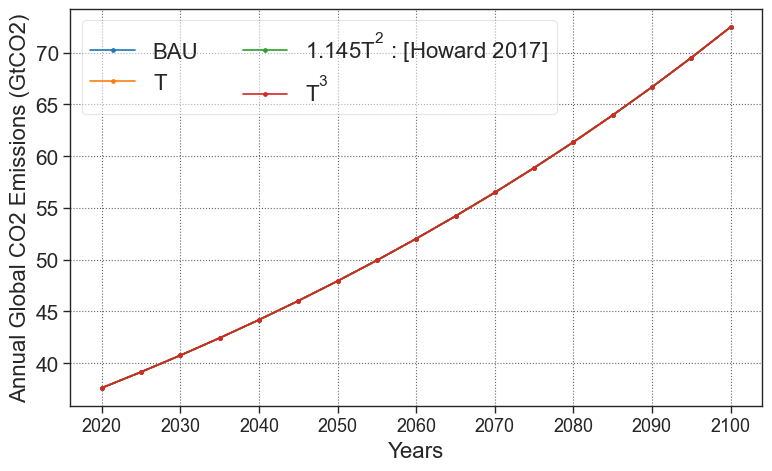

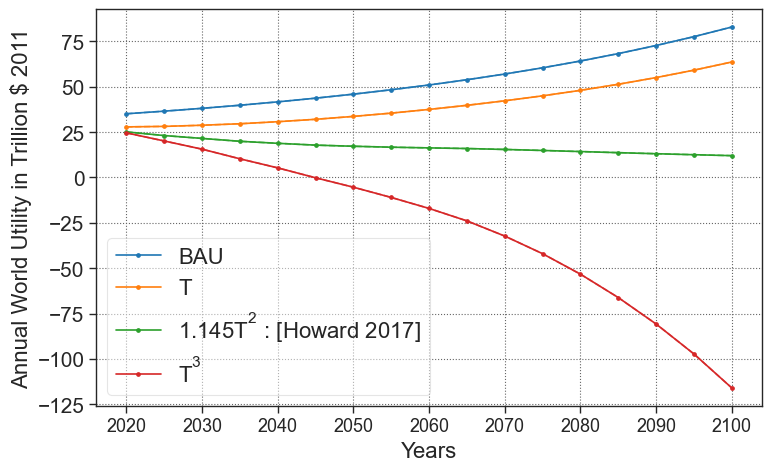

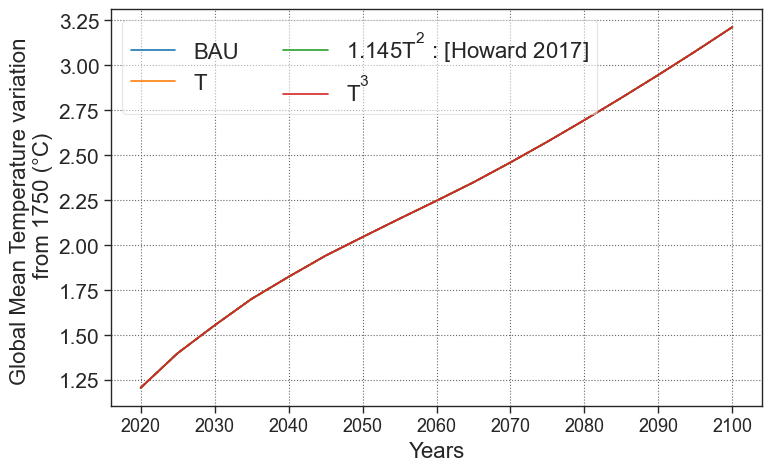

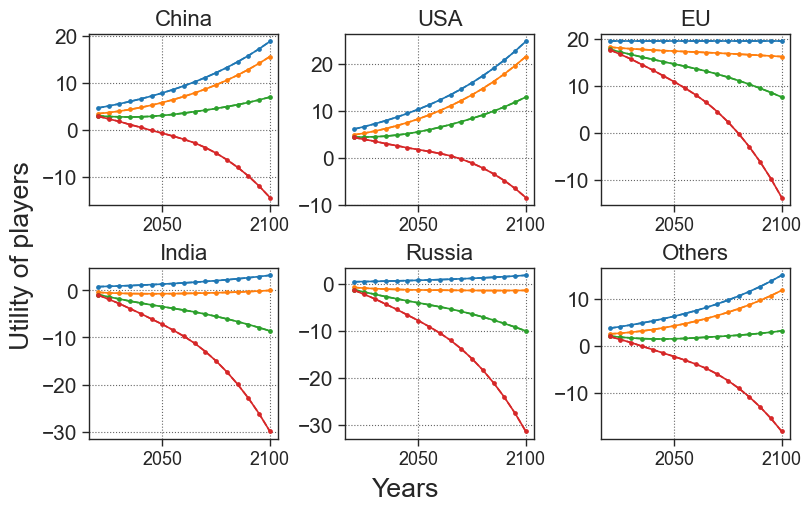

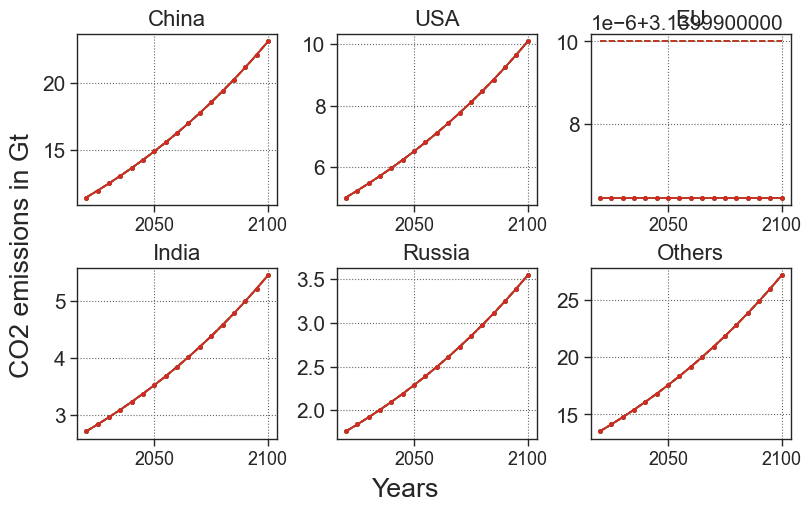

In [5]:
# puissance de la fonction damage 

# Coefficients de la fonction dammage (pour un polynome de degré 2)

list_damage_coef = [np.array([0]), np.array([0,1]), np.array([0,0,1.1450]), np.array([0,0,0,1])] #, np.array([0,0,0,0,1])]
list_damage_label = ['BAU', '$T$', '$1.145T^2$ : [Howard 2017]', '$T^3$'] #,  '$T^4$']

list_ne = []
list_ne_u = []
list_sum_action = []
list_sum_utilities = []
list_temp = []
list_so = []
list_so_u = []
list_sum_action_so = []
list_sum_utilities_so = []
list_temp_so = []
list_sum_action_planning = []
list_sum_utilities_planning = []
list_temp_planning = []
for damage_coef in list_damage_coef :
    list_players = create_players(list_benefit_functions=BENEFITS_CONVEX,  damage_function=damage_polynome(damage_coef), discount=1)

    game = Game(list_players, update_allowed=True)

    X = 2020 + np.arange(game.T)*5

    game.repeated_one_shot_game_NE()
    game.reset()

    game.repeated_one_shot_game_SO()
    list_ne.append(game.ne_a_p)
    list_ne_u.append(game.ne_u_p)
    list_sum_action.append(game.ne_sum_a_p)
    list_temp.append(game.ne_temp_p)
    list_sum_utilities.append(game.ne_sum_u_p)
    list_so.append(game.so_a_p)
    list_so_u.append(game.so_u_p)
    list_sum_action_so.append(game.so_sum_a_p)
    list_temp_so.append(game.so_temp_p)
    list_sum_utilities_so.append(game.so_sum_u_p)


plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_action[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_sum_action_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)

# plt.plot(X[:len(RCP_26)], RCP_26, label="RCP - 2.6", marker="*", color='green', alpha = 0.7)
# plt.plot(X[:len(RCP_26)], RCP_85, label="RCP - 8.5",marker="*", color='red', alpha = 0.7)
# plt.plot(X[:len(RCP_26)], RCP_60, label="RCP - 6.0",marker="*", color='blue', alpha = 0.7)
plt.ylabel('Annual Global CO2 Emissions (GtCO2)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
plt.savefig(fname="plots_paper/Annual_Global_CO2_Emission_convex_RCP_{}.pdf".format(game.horizon), format='pdf')
plt.show()



plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_utilities[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_sum_utilities_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)

plt.ylabel('Annual World Utility in Trillion $ 2011')
plt.xlabel('Years')
plt.legend(fancybox=True, framealpha=0.5)
plt.savefig(fname="plots_paper/Annual_World_Utility_convex_{}.pdf".format(game.horizon), format='pdf')
plt.show()




plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_temp[idx], label=list_damage_label[idx])
    plt.plot(X, list_temp_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)
# plt.plot(X[:len(temp_RCP26)], temp_RCP26, label="RCP - 2.6", marker="*", color='green', alpha = 0.7)
# plt.plot(X[:len(temp_RCP26)], temp_RCP85, label="RCP - 8.5",marker="*", color='red', alpha = 0.7)
# plt.plot(X[:len(temp_RCP26)], temp_RCP60, label="RCP - 6.0",marker="*", color='blue', alpha = 0.7)
plt.ylabel('Global Mean Temperature variation \n from 1750 (°C)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
plt.savefig(fname="plots_paper/Global_Mean_Temperature_convex_RCP_{}.pdf".format(game.horizon), format='pdf')
plt.show()

fig, axes = plt.subplots(2, 3, dpi = 100, figsize=(8,5), constrained_layout=True)
# fig.tight_layout()
for k in range(N):
    for ne_u, so_u in zip(list_ne_u, list_so_u):
        p = axes[k//3, k%3].plot(X, ne_u[k], marker='.')
        axes[k//3, k%3].plot(X, so_u[k], color=p[0].get_color(), ls='--')
        # axes[k//3, k%3].plot(X, game.ne_u_val_planning_brd[k], marker = '1')
        axes[k//3, k%3].set_title('{}'.format(NAMES[k]))
        # axes[k//3, k%3].set_ylim(bottom=-0.2,top=ACTION_SETS[k,1]*1.05, auto=True)

        # if k%3==0:
        #     axes[k//3, k%3].set_ylabel('')
        # if k//3 ==1:
        #     axes[k//3, k%3].set_xlabel('')
fig.supylabel('Utility of players')
fig.supxlabel('Years')

plt.savefig(fname="plots_paper/Utilities_OS_convex_{}.pdf".format(game.horizon), format='pdf')
plt.show()

fig, axes = plt.subplots(2, 3, dpi = 100, figsize=(8,5), constrained_layout=True)
# fig.tight_layout()
for k in range(N):
    for ne_u, so_u in zip(list_ne, list_so):
        p = axes[k//3, k%3].plot(X, ne_u[k], marker='.')
        axes[k//3, k%3].plot(X, so_u[k], color=p[0].get_color(), ls='--')
        # axes[k//3, k%3].plot(X, game.ne_u_val_planning_brd[k], marker = '1')
        axes[k//3, k%3].set_title('{}'.format(NAMES[k]))
        # axes[k//3, k%3].set_ylim(bottom=-0.2,top=ACTION_SETS[k,1]*1.05, auto=True)

        # if k%3==0:
        #     axes[k//3, k%3].set_ylabel('')
        # if k//3 ==1:
        #     axes[k//3, k%3].set_xlabel('')
fig.supylabel('CO2 emissions in Gt')
fig.supxlabel('Years')

plt.savefig(fname="plots_paper/Actions_OS_convex_{}.pdf".format(game.horizon), format='pdf')
plt.show()

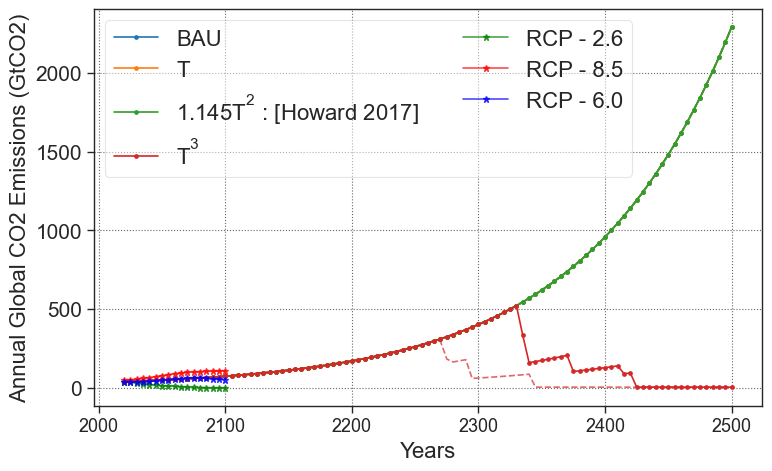

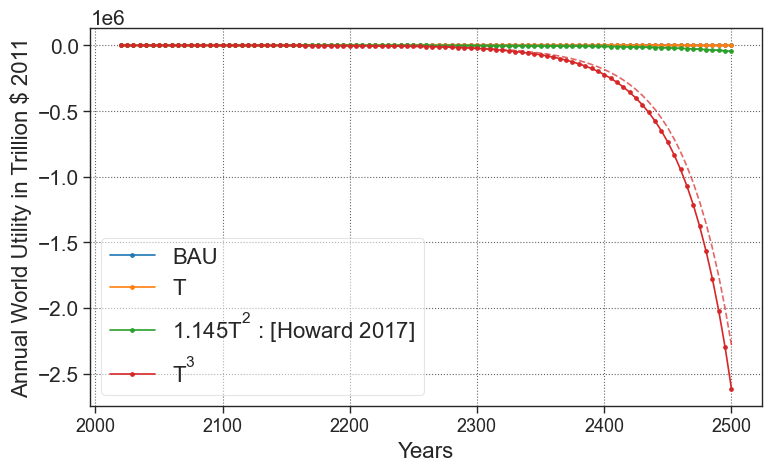

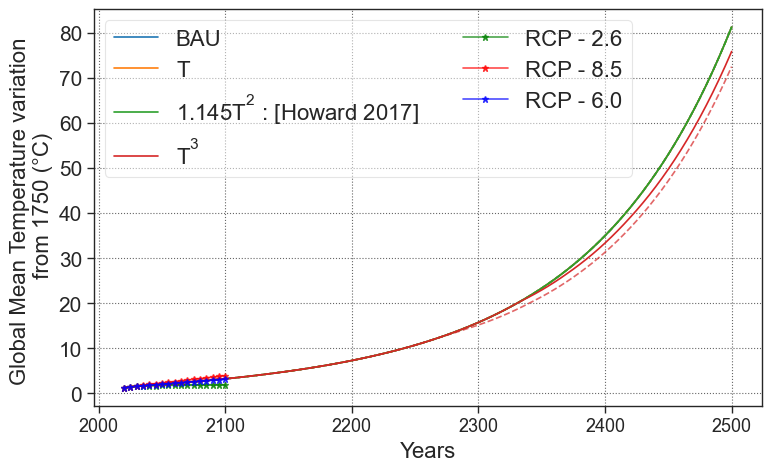

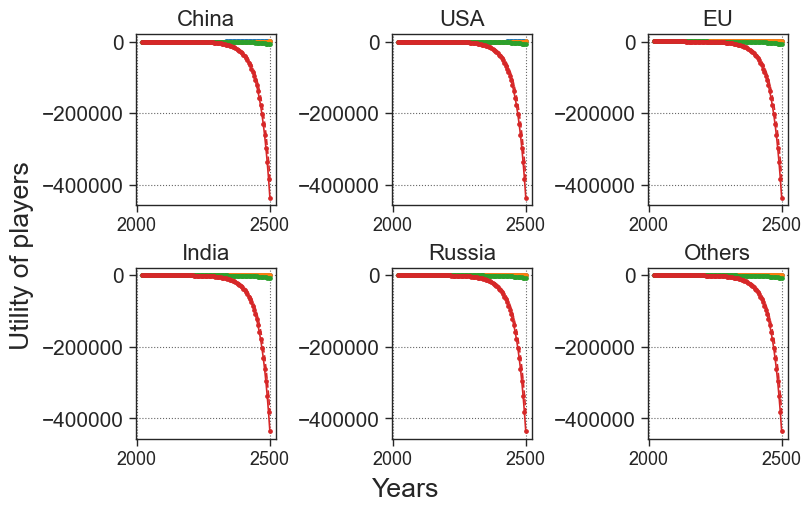

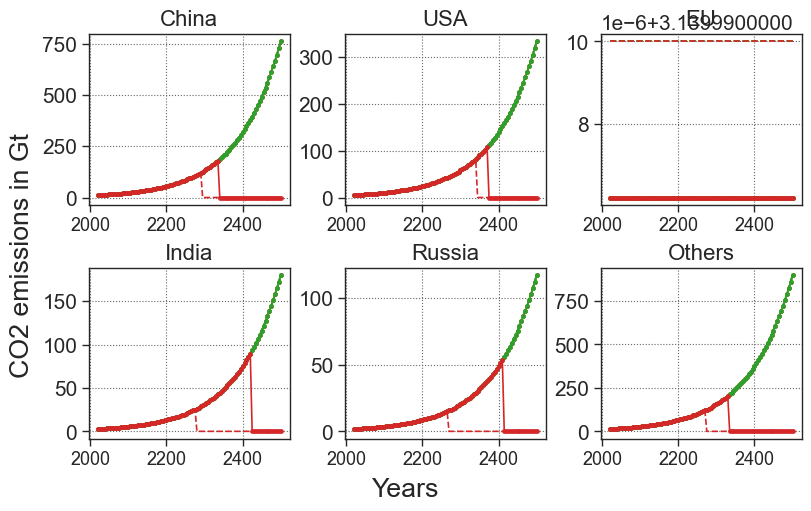

In [6]:
# puissance de la fonction damage 

# Coefficients de la fonction dammage (pour un polynome de degré 2)

list_damage_coef = [np.array([0]), np.array([0,1]), np.array([0,0,1.1450]), np.array([0,0,0,1])] #, np.array([0,0,0,0,1])]
list_damage_label = ['BAU', '$T$', '$1.145T^2$ : [Howard 2017]', '$T^3$'] #,  '$T^4$']

list_ne = []
list_ne_u = []
list_sum_action = []
list_sum_utilities = []
list_temp = []
list_so = []
list_so_u = []
list_sum_action_so = []
list_sum_utilities_so = []
list_temp_so = []
list_sum_action_planning = []
list_sum_utilities_planning = []
list_temp_planning = []
for damage_coef in list_damage_coef :
    list_players = create_players(list_benefit_functions=BENEFITS_CONVEX,  damage_function=damage_polynome(damage_coef), discount=1)

    game = Game(list_players, update_allowed=True, horizon=2500)

    X = 2020 + np.arange(game.T)*5

    game.repeated_one_shot_game_NE()
    game.reset()

    game.repeated_one_shot_game_SO()
    list_ne.append(game.ne_a_p)
    list_ne_u.append(game.ne_u_p)
    list_sum_action.append(game.ne_sum_a_p)
    list_temp.append(game.ne_temp_p)
    list_sum_utilities.append(game.ne_sum_u_p)
    list_so.append(game.so_a_p)
    list_so_u.append(game.so_u_p)
    list_sum_action_so.append(game.so_sum_a_p)
    list_temp_so.append(game.so_temp_p)
    list_sum_utilities_so.append(game.so_sum_u_p)


plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_action[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_sum_action_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)

plt.plot(X[:len(RCP_26)], RCP_26, label="RCP - 2.6", marker="*", color='green', alpha = 0.7)
plt.plot(X[:len(RCP_26)], RCP_85, label="RCP - 8.5",marker="*", color='red', alpha = 0.7)
plt.plot(X[:len(RCP_26)], RCP_60, label="RCP - 6.0",marker="*", color='blue', alpha = 0.7)
plt.ylabel('Annual Global CO2 Emissions (GtCO2)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
plt.savefig(fname="plots_paper/Annual_Global_CO2_Emission_convex_RCP_{}.pdf".format(game.horizon), format='pdf')
plt.show()



plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_utilities[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_sum_utilities_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)

plt.ylabel('Annual World Utility in Trillion $ 2011')
plt.xlabel('Years')
plt.legend(fancybox=True, framealpha=0.5)
plt.savefig(fname="plots_paper/Annual_World_Utility_convex_{}.pdf".format(game.horizon), format='pdf')
plt.show()




plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_temp[idx], label=list_damage_label[idx])
    plt.plot(X, list_temp_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)
plt.plot(X[:len(temp_RCP26)], temp_RCP26, label="RCP - 2.6", marker="*", color='green', alpha = 0.7)
plt.plot(X[:len(temp_RCP26)], temp_RCP85, label="RCP - 8.5",marker="*", color='red', alpha = 0.7)
plt.plot(X[:len(temp_RCP26)], temp_RCP60, label="RCP - 6.0",marker="*", color='blue', alpha = 0.7)
plt.ylabel('Global Mean Temperature variation \n from 1750 (°C)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
plt.savefig(fname="plots_paper/Global_Mean_Temperature_convex_RCP_{}.pdf".format(game.horizon), format='pdf')
plt.show()

fig, axes = plt.subplots(2, 3, dpi = 100, figsize=(8,5), constrained_layout=True)
# fig.tight_layout()
for k in range(N):
    for ne_u, so_u in zip(list_ne_u, list_so_u):
        p = axes[k//3, k%3].plot(X, ne_u[k], marker='.')
        axes[k//3, k%3].plot(X, so_u[k], color=p[0].get_color(), ls='--')
        # axes[k//3, k%3].plot(X, game.ne_u_val_planning_brd[k], marker = '1')
        axes[k//3, k%3].set_title('{}'.format(NAMES[k]))
        # axes[k//3, k%3].set_ylim(bottom=-0.2,top=ACTION_SETS[k,1]*1.05, auto=True)

        # if k%3==0:
        #     axes[k//3, k%3].set_ylabel('')
        # if k//3 ==1:
        #     axes[k//3, k%3].set_xlabel('')
fig.supylabel('Utility of players')
fig.supxlabel('Years')

plt.savefig(fname="plots_paper/Utilities_OS_convex_{}.pdf".format(game.horizon), format='pdf')
plt.show()

fig, axes = plt.subplots(2, 3, dpi = 100, figsize=(8,5), constrained_layout=True)
# fig.tight_layout()
for k in range(N):
    for ne_u, so_u in zip(list_ne, list_so):
        p = axes[k//3, k%3].plot(X, ne_u[k], marker='.')
        axes[k//3, k%3].plot(X, so_u[k], color=p[0].get_color(), ls='--')
        # axes[k//3, k%3].plot(X, game.ne_u_val_planning_brd[k], marker = '1')
        axes[k//3, k%3].set_title('{}'.format(NAMES[k]))
        # axes[k//3, k%3].set_ylim(bottom=-0.2,top=ACTION_SETS[k,1]*1.05, auto=True)

        # if k%3==0:
        #     axes[k//3, k%3].set_ylabel('')
        # if k//3 ==1:
        #     axes[k//3, k%3].set_xlabel('')
fig.supylabel('CO2 emissions in Gt')
fig.supxlabel('Years')

plt.savefig(fname="plots_paper/Actions_OS_convex_{}.pdf".format(game.horizon), format='pdf')
plt.show()

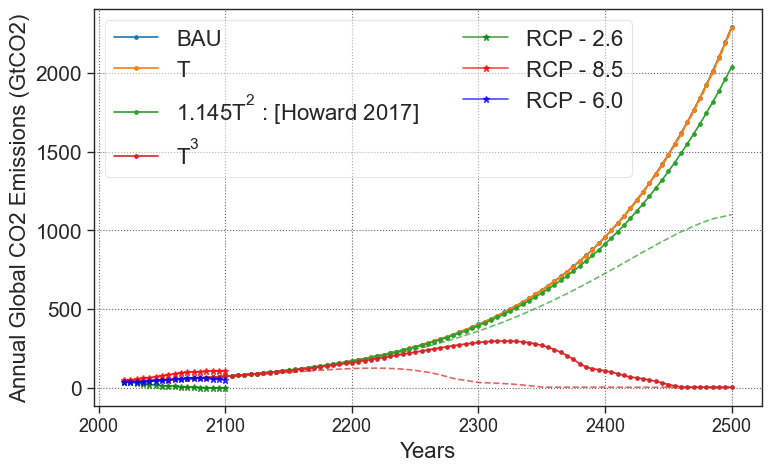

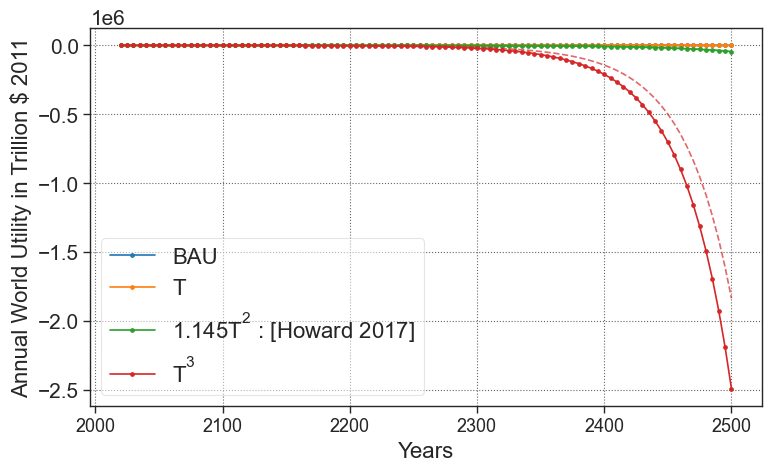

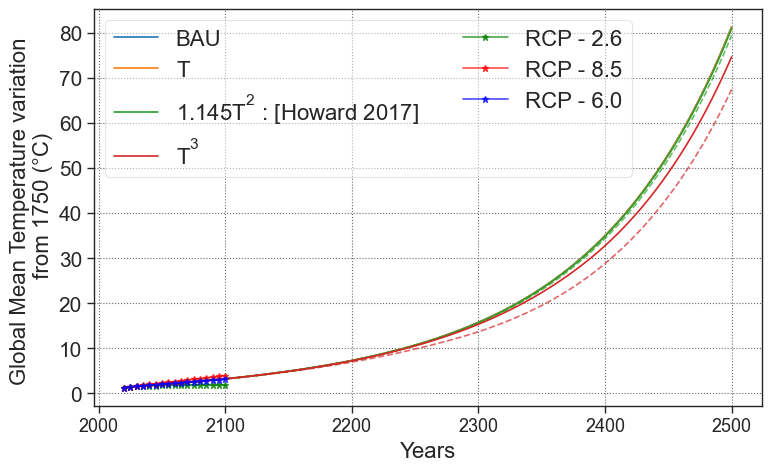

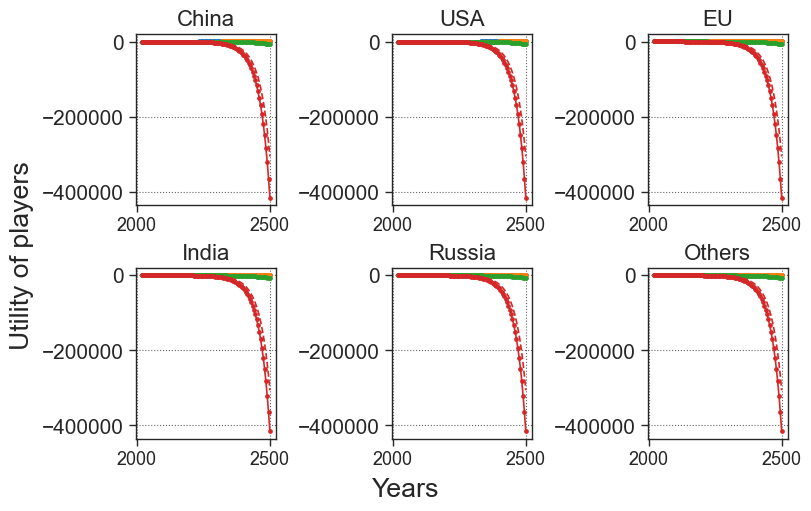

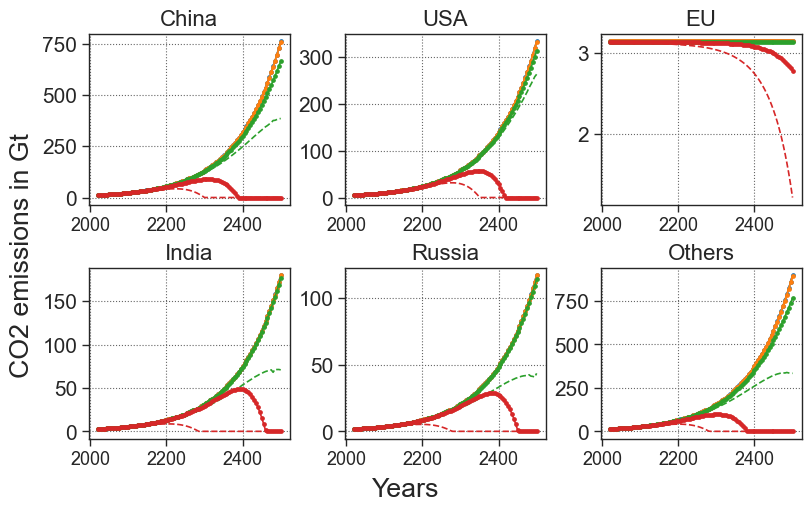

In [22]:
# puissance de la fonction damage 

# Coefficients de la fonction dammage (pour un polynome de degré 2)

list_damage_coef = [np.array([0]), np.array([0,1]), np.array([0,0,1.1450]), np.array([0,0,0,1])] #, np.array([0,0,0,0,1])]
list_damage_label = ['BAU', '$T$', '$1.145T^2$ : [Howard 2017]', '$T^3$'] #,  '$T^4$']

list_ne = []
list_ne_u = []
list_sum_action = []
list_sum_utilities = []
list_temp = []
list_so = []
list_so_u = []
list_sum_action_so = []
list_sum_utilities_so = []
list_temp_so = []
list_sum_action_planning = []
list_sum_utilities_planning = []
list_temp_planning = []
for damage_coef in list_damage_coef :
    list_players = create_players(list_benefit_functions=BENEFITS_CONCAVE,  damage_function=damage_polynome(damage_coef), discount=1)

    game = Game(list_players, update_allowed=True, horizon=2500)

    X = 2020 + np.arange(game.T)*5

    game.repeated_one_shot_game_NE()
    game.reset()

    game.repeated_one_shot_game_SO()
    list_ne.append(game.ne_a_p)
    list_ne_u.append(game.ne_u_p)
    list_sum_action.append(game.ne_sum_a_p)
    list_temp.append(game.ne_temp_p)
    list_sum_utilities.append(game.ne_sum_u_p)
    list_so.append(game.so_a_p)
    list_so_u.append(game.so_u_p)
    list_sum_action_so.append(game.so_sum_a_p)
    list_temp_so.append(game.so_temp_p)
    list_sum_utilities_so.append(game.so_sum_u_p)


plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_action[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_sum_action_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)

plt.plot(X[:len(RCP_26)], RCP_26, label="RCP - 2.6", marker="*", color='green', alpha = 0.7)
plt.plot(X[:len(RCP_26)], RCP_85, label="RCP - 8.5",marker="*", color='red', alpha = 0.7)
plt.plot(X[:len(RCP_26)], RCP_60, label="RCP - 6.0",marker="*", color='blue', alpha = 0.7)
plt.ylabel('Annual Global CO2 Emissions (GtCO2)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
plt.savefig(fname="plots_paper/Annual_Global_CO2_Emission_concave_RCP_{}.pdf".format(game.horizon), format='pdf')
plt.show()

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_utilities[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_sum_utilities_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)

plt.ylabel('Annual World Utility in Trillion $ 2011')
plt.xlabel('Years')
plt.legend(fancybox=True, framealpha=0.5)
plt.savefig(fname="plots_paper/Annual_World_Utility_concave_{}.pdf".format(game.horizon), format='pdf')
plt.show()




plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_temp[idx], label=list_damage_label[idx])
    plt.plot(X, list_temp_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)
plt.plot(X[:len(temp_RCP26)], temp_RCP26, label="RCP - 2.6", marker="*", color='green', alpha = 0.7)
plt.plot(X[:len(temp_RCP26)], temp_RCP85, label="RCP - 8.5",marker="*", color='red', alpha = 0.7)
plt.plot(X[:len(temp_RCP26)], temp_RCP60, label="RCP - 6.0",marker="*", color='blue', alpha = 0.7)
plt.ylabel('Global Mean Temperature variation \n from 1750 (°C)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
plt.savefig(fname="plots_paper/Global_Mean_Temperature_concave_RCP_{}.pdf".format(game.horizon), format='pdf')
plt.show()

fig, axes = plt.subplots(2, 3, dpi = 100, figsize=(8,5), constrained_layout=True)
# fig.tight_layout()
for k in range(N):
    for ne_u, so_u in zip(list_ne_u, list_so_u):
        p = axes[k//3, k%3].plot(X, ne_u[k], marker='.')
        axes[k//3, k%3].plot(X, so_u[k], color=p[0].get_color(), ls='--')
        # axes[k//3, k%3].plot(X, game.ne_u_val_planning_brd[k], marker = '1')
        axes[k//3, k%3].set_title('{}'.format(NAMES[k]))
        # axes[k//3, k%3].set_ylim(bottom=-0.2,top=ACTION_SETS[k,1]*1.05, auto=True)

        # if k%3==0:
        #     axes[k//3, k%3].set_ylabel('')
        # if k//3 ==1:
        #     axes[k//3, k%3].set_xlabel('')
fig.supylabel('Utility of players')
fig.supxlabel('Years')

plt.savefig(fname="plots_paper/Utilities_OS_concave_{}.pdf".format(game.horizon), format='pdf')
plt.show()

fig, axes = plt.subplots(2, 3, dpi = 100, figsize=(8,5), constrained_layout=True)
# fig.tight_layout()
for k in range(N):
    for ne_u, so_u in zip(list_ne, list_so):
        p = axes[k//3, k%3].plot(X, ne_u[k], marker='.')
        axes[k//3, k%3].plot(X, so_u[k], color=p[0].get_color(), ls='--')
        # axes[k//3, k%3].plot(X, game.ne_u_val_planning_brd[k], marker = '1')
        axes[k//3, k%3].set_title('{}'.format(NAMES[k]))
        # axes[k//3, k%3].set_ylim(bottom=-0.2,top=ACTION_SETS[k,1]*1.05, auto=True)

        # if k%3==0:
        #     axes[k//3, k%3].set_ylabel('')
        # if k//3 ==1:
        #     axes[k//3, k%3].set_xlabel('')
fig.supylabel('CO2 emissions in Gt')
fig.supxlabel('Years')

plt.savefig(fname="plots_paper/Actions_OS_concave_{}.pdf".format(game.horizon), format='pdf')
plt.show()

# 2100

True
True
True


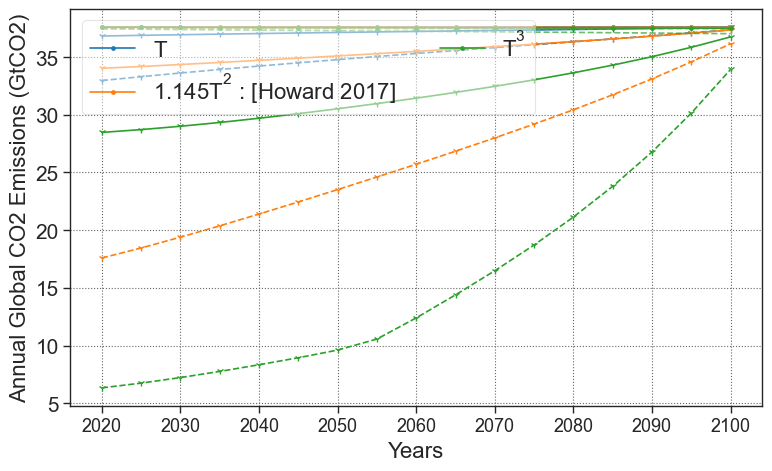

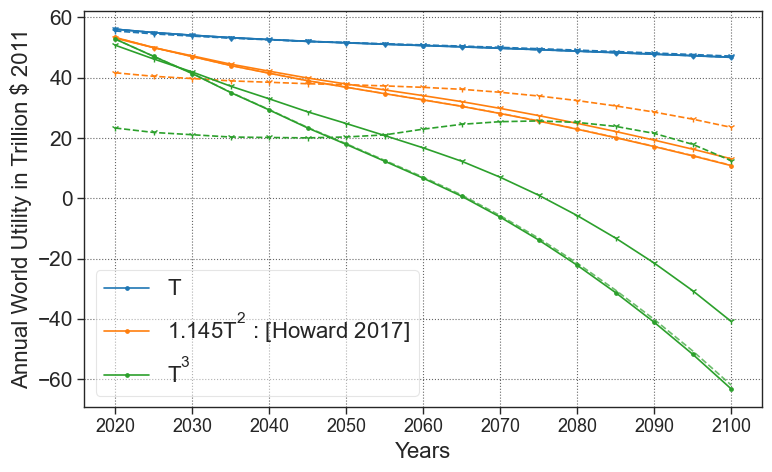

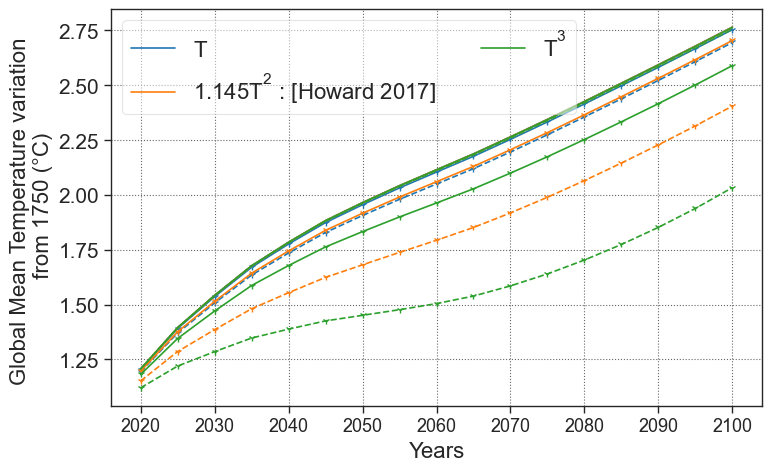

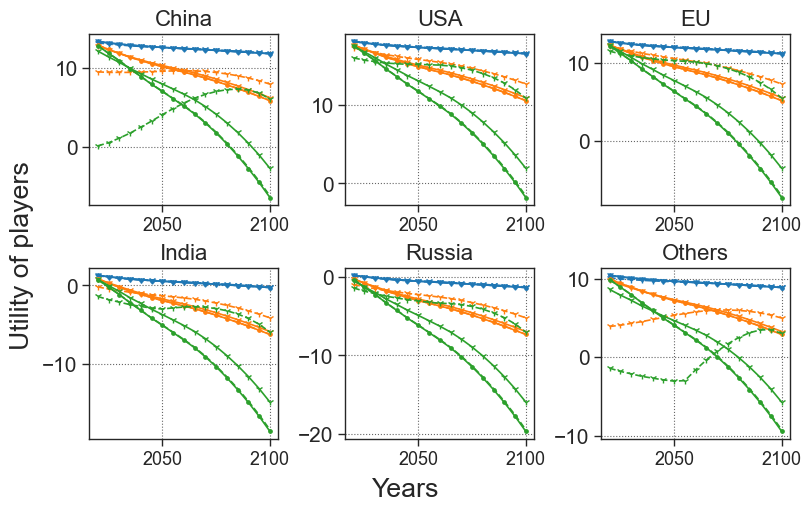

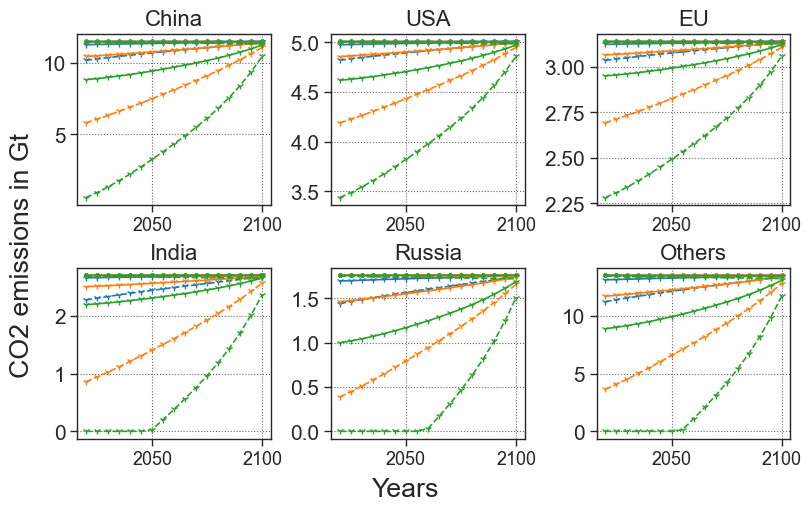

In [13]:
# puissance de la fonction damage 

# Coefficients de la fonction dammage (pour un polynome de degré 2)

list_damage_coef = [ np.array([0,1]), np.array([0,0,1.1450]), np.array([0,0,0,1])] #, np.array([0,0,0,0,1])]
list_damage_label = [ '$T$', '$1.145T^2$ : [Howard 2017]', '$T^3$'] #,  '$T^4$']

list_ne = []
list_so = []
list_ne_u = []
list_so_u = []
list_ne_planning_u = []
list_so_planning_u = []
list_sum_action = []
list_sum_utilities = []
list_temp = []
list_sum_action_so = []
list_sum_utilities_so = []
list_temp_so = []
list_sum_action_planning = []
list_sum_utilities_planning = []
list_temp_planning = []
list_sum_action_planning_so = []
list_sum_utilities_planning_so = []
list_temp_planning_so = []
list_ne_planning = []
list_so_planning = []
for damage_coef in list_damage_coef :
    list_players = create_players(list_benefit_functions=BENEFITS_CONCAVE,  damage_function=damage_polynome(damage_coef), discount=1)

    game = Game(list_players)

    X = 2020 + np.arange(game.T)*5
    game.repeated_one_shot_game_NE()
    game.reset()

    game.repeated_one_shot_game_SO()
    game.reset()
    
    game.planning_BRD()
    game.planning_SO()
    list_ne.append(game.ne_a_p)
    list_ne_u.append(game.ne_u_p)
    list_ne_planning_u.append(game.ne_u_planning_brd)
    
    list_so.append(game.so_a_p)

    list_so_u.append(game.so_u_p)
    list_so_planning_u.append(game.so_u_planning)
    list_sum_action.append(game.ne_sum_a_p)
    list_temp.append(game.ne_temp_p)
    list_sum_utilities.append(game.ne_sum_u_p)
    
    list_sum_action_so.append(game.so_sum_a_p)
    list_temp_so.append(game.so_temp_p)
    list_sum_utilities_so.append(game.so_sum_u_p)

    list_ne_planning.append(game.ne_a_planning_brd)
    list_sum_action_planning.append(game.ne_sum_a_planning_brd)
    list_temp_planning.append(game.ne_temp_planning_brd)
    list_sum_utilities_planning.append(game.ne_sum_u_planning_brd)

    list_so_planning.append(game.so_a_planning)

    list_sum_action_planning_so.append(game.so_sum_a_planning)
    list_temp_planning_so.append(game.so_temp_planning)
    list_sum_utilities_planning_so.append(game.so_sum_u_planning)

plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_action[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_sum_action_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)
    plt.plot(X, list_sum_action_planning[idx], color= p[0].get_color(),marker='1' )
    plt.plot(X, list_sum_action_planning_so[idx], color= p[0].get_color(),marker='1', ls='--' )

plt.ylabel('Annual Global CO2 Emissions (GtCO2)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
plt.savefig(fname="plots_paper/Annual_Global_CO2_Emission_planning_concave_{}.pdf".format(game.horizon), format='pdf')
plt.show()

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_utilities[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_sum_utilities_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)
    plt.plot(X, list_sum_utilities_planning[idx], color= p[0].get_color(),marker='1' )
    plt.plot(X, list_sum_utilities_planning_so[idx], color= p[0].get_color(),marker='1',ls='--' )

plt.ylabel('Annual World Utility in Trillion $ 2011')
plt.xlabel('Years')
plt.legend(fancybox=True, framealpha=0.5)
plt.savefig(fname="plots_paper/Annual_World_Utility_planning_concave_{}.pdf".format(game.horizon), format='pdf')
plt.show()




plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_temp[idx], label=list_damage_label[idx])
    plt.plot(X, list_temp_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)
    plt.plot(X, list_temp_planning[idx], color= p[0].get_color(),marker='1')
    plt.plot(X, list_temp_planning_so[idx], color= p[0].get_color(),marker='1', ls='--')


plt.ylabel('Global Mean Temperature variation \n from 1750 (°C)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
plt.savefig(fname="plots_paper/Global_Mean_Temperature_planning_concave_{}.pdf".format(game.horizon), format='pdf')
plt.show()


fig, axes = plt.subplots(2, 3, dpi = 100, figsize=(8,5), constrained_layout=True)

for k in range(N):
    for ne_u, so_u, ne_planning_u, so_planning_u in zip(list_ne_u, list_so_u, list_ne_planning_u, list_so_planning_u ):
        p = axes[k//3, k%3].plot(X, ne_u[k], marker='.')
        axes[k//3, k%3].plot(X, so_u[k], color=p[0].get_color(), ls='--')
        axes[k//3, k%3].plot(X, ne_planning_u[k],color=p[0].get_color(), marker = '1')
        axes[k//3, k%3].plot(X, so_planning_u[k],color=p[0].get_color(), marker = '1', ls ='--')
        axes[k//3, k%3].set_title('{}'.format(NAMES[k]))

fig.supylabel('Utility of players')
fig.supxlabel('Years')

plt.savefig(fname="plots_paper/Utilities_planning_concave_{}.pdf".format(game.horizon), format='pdf')
plt.show()

fig, axes = plt.subplots(2, 3, dpi = 100, figsize=(8,5), constrained_layout=True)
# fig.tight_layout()
for k in range(N):
    for ne_u, so_u, ne_planning_u, so_planning_u in zip(list_ne, list_so, list_ne_planning, list_so_planning):
        p = axes[k//3, k%3].plot(X, ne_u[k], marker='.')
        axes[k//3, k%3].plot(X, so_u[k], color=p[0].get_color(), ls='--')
        axes[k//3, k%3].plot(X, ne_planning_u[k],color=p[0].get_color(), marker = '1')
        axes[k//3, k%3].plot(X, so_planning_u[k],color=p[0].get_color(), marker = '1', ls ='--')
        axes[k//3, k%3].set_title('{}'.format(NAMES[k]))
fig.supylabel('CO2 emissions in Gt')
fig.supxlabel('Years')

plt.savefig(fname="plots_paper/Actions_planning_concave_{}.pdf".format(game.horizon), format='pdf')
plt.show()

True
True
True


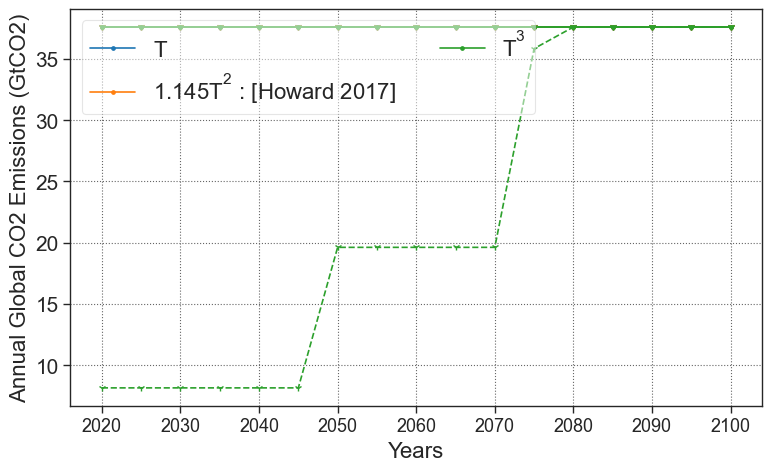

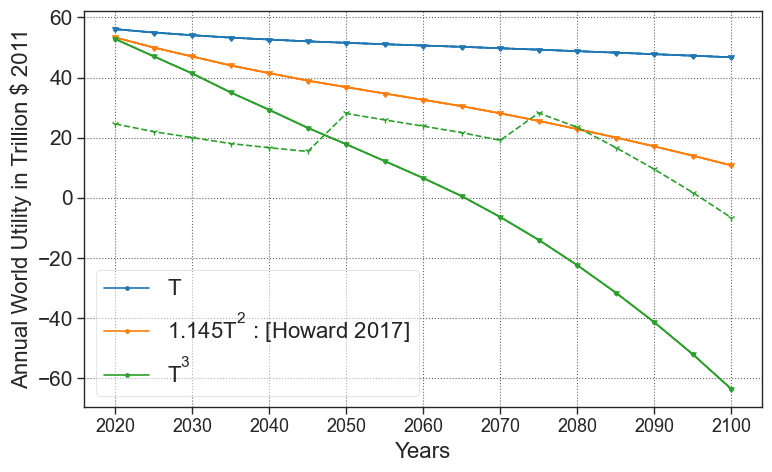

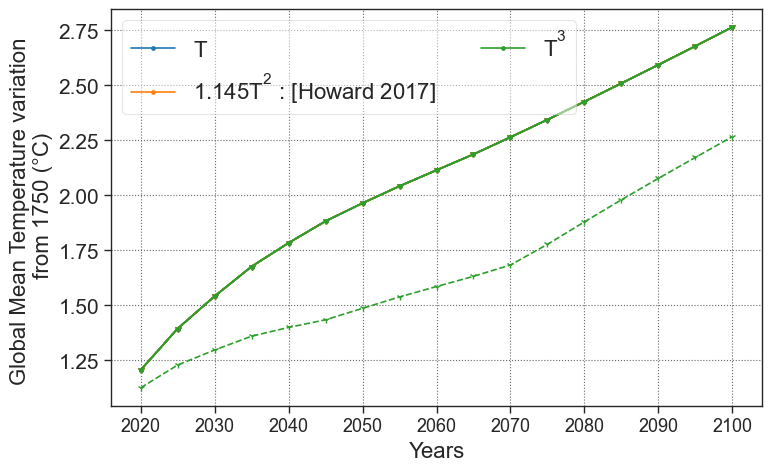

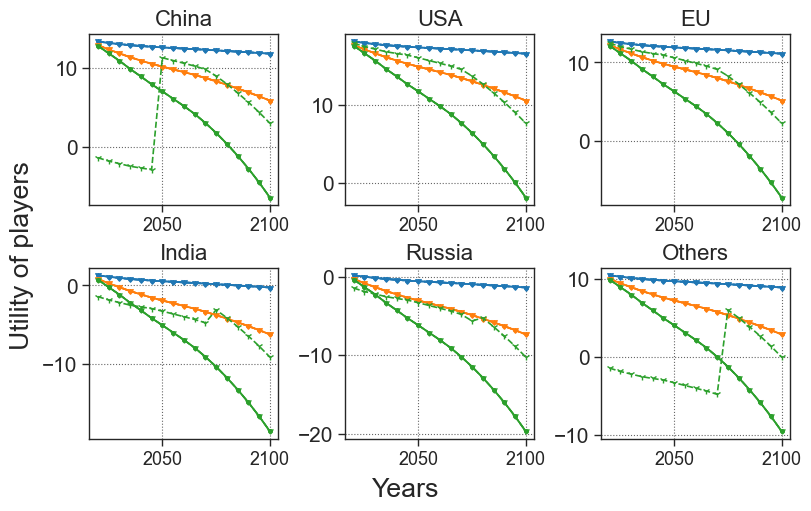

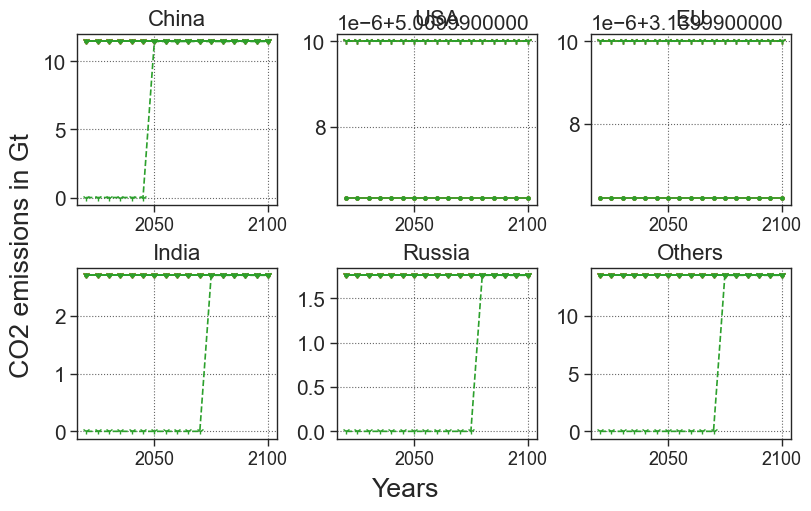

In [12]:
# puissance de la fonction damage 

# Coefficients de la fonction dammage (pour un polynome de degré 2)

list_damage_coef = [ np.array([0,1]), np.array([0,0,1.1450]), np.array([0,0,0,1])] #, np.array([0,0,0,0,1])]
list_damage_label = [ '$T$', '$1.145T^2$ : [Howard 2017]', '$T^3$'] #,  '$T^4$']

list_ne = []
list_so = []
list_ne_u = []
list_so_u = []
list_ne_planning_u = []
list_so_planning_u = []
list_sum_action = []
list_sum_utilities = []
list_temp = []
list_sum_action_so = []
list_sum_utilities_so = []
list_temp_so = []
list_sum_action_planning = []
list_sum_utilities_planning = []
list_temp_planning = []
list_sum_action_planning_so = []
list_sum_utilities_planning_so = []
list_temp_planning_so = []
list_ne_planning = []
list_so_planning = []
for damage_coef in list_damage_coef :
    list_players = create_players(list_benefit_functions=BENEFITS_CONVEX,  damage_function=damage_polynome(damage_coef), discount=1)

    game = Game(list_players)

    X = 2020 + np.arange(game.T)*5
    game.repeated_one_shot_game_NE()
    game.reset()

    game.repeated_one_shot_game_SO()
    game.reset()
    
    game.planning_BRD()
    game.planning_SO()
    list_ne.append(game.ne_a_p)
    list_ne_u.append(game.ne_u_p)
    list_ne_planning_u.append(game.ne_u_planning_brd)
    
    list_so.append(game.so_a_p)

    list_so_u.append(game.so_u_p)
    list_so_planning_u.append(game.so_u_planning)
    list_sum_action.append(game.ne_sum_a_p)
    list_temp.append(game.ne_temp_p)
    list_sum_utilities.append(game.ne_sum_u_p)
    
    list_sum_action_so.append(game.so_sum_a_p)
    list_temp_so.append(game.so_temp_p)
    list_sum_utilities_so.append(game.so_sum_u_p)

    list_ne_planning.append(game.ne_a_planning_brd)
    list_sum_action_planning.append(game.ne_sum_a_planning_brd)
    list_temp_planning.append(game.ne_temp_planning_brd)
    list_sum_utilities_planning.append(game.ne_sum_u_planning_brd)

    list_so_planning.append(game.so_a_planning)

    list_sum_action_planning_so.append(game.so_sum_a_planning)
    list_temp_planning_so.append(game.so_temp_planning)
    list_sum_utilities_planning_so.append(game.so_sum_u_planning)

plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_action[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_sum_action_so[idx], color= p[0].get_color(), ls='--', marker='.', alpha = 0.7)
    plt.plot(X, list_sum_action_planning[idx], color= p[0].get_color(),marker='1' )
    plt.plot(X, list_sum_action_planning_so[idx], color= p[0].get_color(),marker='1', ls='--' )

plt.ylabel('Annual Global CO2 Emissions (GtCO2)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
plt.savefig(fname="plots_paper/Annual_Global_CO2_Emission_planning_convex_{}.pdf".format(game.horizon), format='pdf')
plt.show()

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_utilities[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_sum_utilities_so[idx], color= p[0].get_color(), ls='--', marker='.', alpha = 0.7)
    plt.plot(X, list_sum_utilities_planning[idx], color= p[0].get_color(),marker='1' )
    plt.plot(X, list_sum_utilities_planning_so[idx], color= p[0].get_color(),marker='1',ls='--' )

plt.ylabel('Annual World Utility in Trillion $ 2011')
plt.xlabel('Years')
plt.legend(fancybox=True, framealpha=0.5)
plt.savefig(fname="plots_paper/Annual_World_Utility_planning_convex_{}.pdf".format(game.horizon), format='pdf')
plt.show()




plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_temp[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_temp_so[idx], color= p[0].get_color(), ls='--',marker='.',  alpha = 0.7)
    plt.plot(X, list_temp_planning[idx], color= p[0].get_color(),marker='1')
    plt.plot(X, list_temp_planning_so[idx], color= p[0].get_color(),marker='1', ls='--')


plt.ylabel('Global Mean Temperature variation \n from 1750 (°C)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
plt.savefig(fname="plots_paper/Global_Mean_Temperature_planning_convex_{}.pdf".format(game.horizon), format='pdf')
plt.show()


fig, axes = plt.subplots(2, 3, dpi = 100, figsize=(8,5), constrained_layout=True)

for k in range(N):
    for ne_u, so_u, ne_planning_u, so_planning_u in zip(list_ne_u, list_so_u, list_ne_planning_u, list_so_planning_u ):
        p = axes[k//3, k%3].plot(X, ne_u[k], marker='.')
        axes[k//3, k%3].plot(X, so_u[k], color=p[0].get_color(), marker='.', ls='--')
        axes[k//3, k%3].plot(X, ne_planning_u[k],color=p[0].get_color(), marker = '1')
        axes[k//3, k%3].plot(X, so_planning_u[k],color=p[0].get_color(), marker = '1', ls ='--')
        axes[k//3, k%3].set_title('{}'.format(NAMES[k]))

fig.supylabel('Utility of players')
fig.supxlabel('Years')

plt.savefig(fname="plots_paper/Utilities_planning_convex_{}.pdf".format(game.horizon), format='pdf')
plt.show()

fig, axes = plt.subplots(2, 3, dpi = 100, figsize=(8,5), constrained_layout=True)
# fig.tight_layout()
for k in range(N):
    for ne_u, so_u, ne_planning_u, so_planning_u in zip(list_ne, list_so, list_ne_planning, list_so_planning):
        p = axes[k//3, k%3].plot(X, ne_u[k], marker='.')
        axes[k//3, k%3].plot(X, so_u[k], color=p[0].get_color(), ls='--')
        axes[k//3, k%3].plot(X, ne_planning_u[k],color=p[0].get_color(), marker = '1')
        axes[k//3, k%3].plot(X, so_planning_u[k],color=p[0].get_color(), marker = '1', ls ='--')
        axes[k//3, k%3].set_title('{}'.format(NAMES[k]))
fig.supylabel('CO2 emissions in Gt')
fig.supxlabel('Years')

plt.savefig(fname="plots_paper/Actions_planning_convex_{}.pdf".format(game.horizon), format='pdf')
plt.show()

True
True
True
True


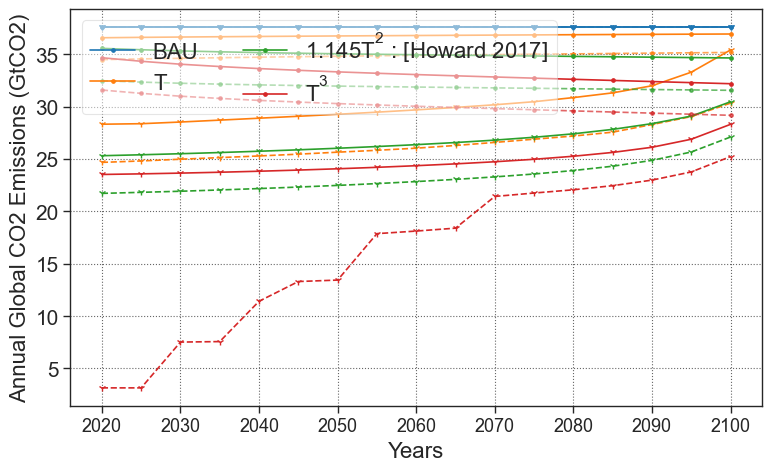

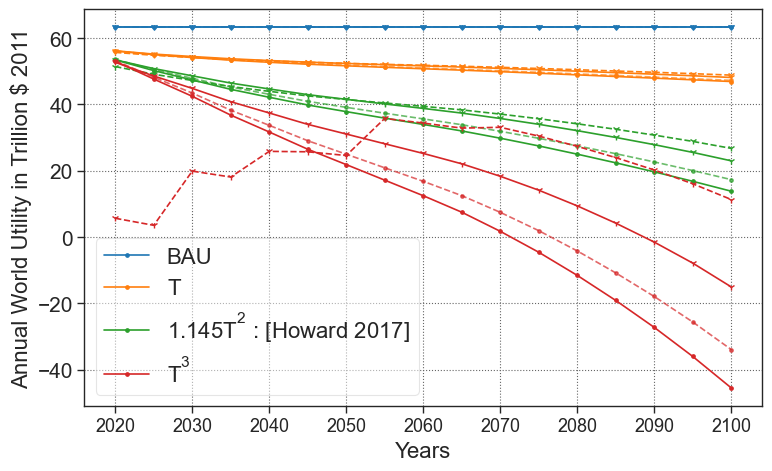

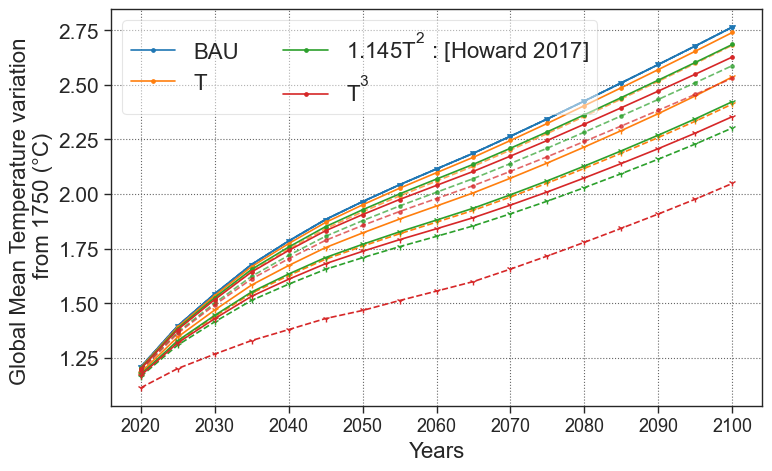

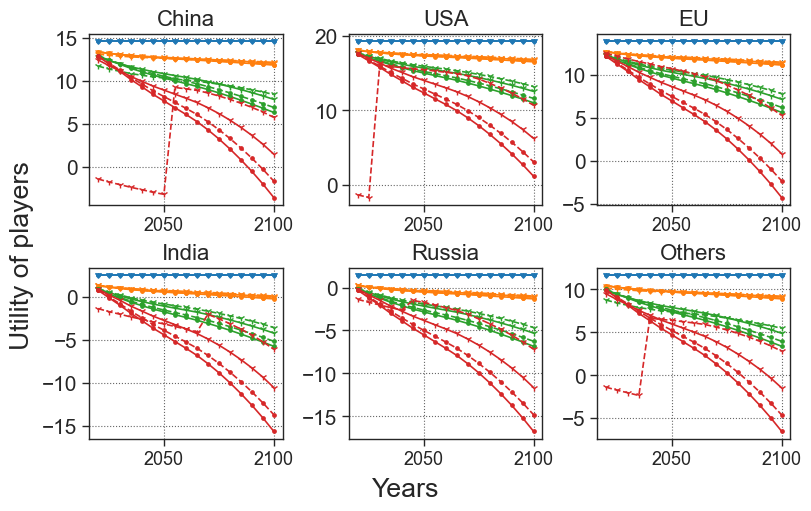

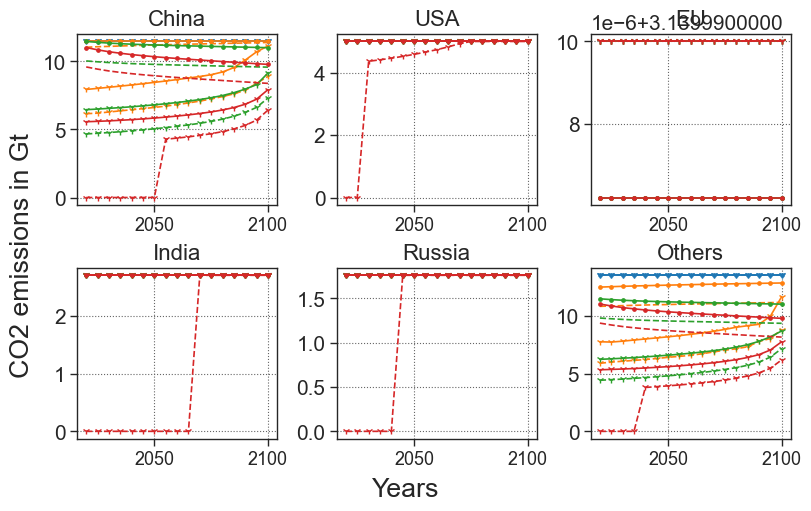

In [11]:
# puissance de la fonction damage 

# Coefficients de la fonction dammage (pour un polynome de degré 2)

list_damage_coef = [np.array([0]), np.array([0,1]), np.array([0,0,1.1450]), np.array([0,0,0,1])] #, np.array([0,0,0,0,1])]
list_damage_label = ['BAU', '$T$', '$1.145T^2$ : [Howard 2017]', '$T^3$'] #,  '$T^4$']

list_ne = []
list_so = []
list_ne_u = []
list_so_u = []
list_ne_planning_u = []
list_so_planning_u = []
list_sum_action = []
list_sum_utilities = []
list_temp = []
list_sum_action_so = []
list_sum_utilities_so = []
list_temp_so = []
list_sum_action_planning = []
list_sum_utilities_planning = []
list_temp_planning = []
list_sum_action_planning_so = []
list_sum_utilities_planning_so = []
list_temp_planning_so = []
list_ne_planning = []
list_so_planning = []
for damage_coef in list_damage_coef :
    list_players = create_players(list_benefit_functions=BENEFITS_SIGMOID,  damage_function=damage_polynome(damage_coef), discount=1)

    game = Game(list_players)

    X = 2020 + np.arange(game.T)*5
    game.repeated_one_shot_game_NE()
    game.reset()

    game.repeated_one_shot_game_SO()
    game.reset()
    
    game.planning_BRD()
    game.planning_SO()
    list_ne.append(game.ne_a_p)
    list_ne_u.append(game.ne_u_p)
    list_ne_planning_u.append(game.ne_u_planning_brd)
    
    list_so.append(game.so_a_p)

    list_so_u.append(game.so_u_p)
    list_so_planning_u.append(game.so_u_planning)
    list_sum_action.append(game.ne_sum_a_p)
    list_temp.append(game.ne_temp_p)
    list_sum_utilities.append(game.ne_sum_u_p)
    
    list_sum_action_so.append(game.so_sum_a_p)
    list_temp_so.append(game.so_temp_p)
    list_sum_utilities_so.append(game.so_sum_u_p)

    list_ne_planning.append(game.ne_a_planning_brd)
    list_sum_action_planning.append(game.ne_sum_a_planning_brd)
    list_temp_planning.append(game.ne_temp_planning_brd)
    list_sum_utilities_planning.append(game.ne_sum_u_planning_brd)

    list_so_planning.append(game.so_a_planning)

    list_sum_action_planning_so.append(game.so_sum_a_planning)
    list_temp_planning_so.append(game.so_temp_planning)
    list_sum_utilities_planning_so.append(game.so_sum_u_planning)

plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_action[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_sum_action_so[idx], color= p[0].get_color(), ls='--', marker='.', alpha = 0.7)
    plt.plot(X, list_sum_action_planning[idx], color= p[0].get_color(),marker='1' )
    plt.plot(X, list_sum_action_planning_so[idx], color= p[0].get_color(),marker='1', ls='--' )

plt.ylabel('Annual Global CO2 Emissions (GtCO2)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
plt.savefig(fname="plots_paper/Annual_Global_CO2_Emission_planning_sigmoid_{}.pdf".format(game.horizon), format='pdf')
plt.show()

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_utilities[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_sum_utilities_so[idx], color= p[0].get_color(), ls='--', marker='.', alpha = 0.7)
    plt.plot(X, list_sum_utilities_planning[idx], color= p[0].get_color(),marker='1' )
    plt.plot(X, list_sum_utilities_planning_so[idx], color= p[0].get_color(),marker='1',ls='--' )

plt.ylabel('Annual World Utility in Trillion $ 2011')
plt.xlabel('Years')
plt.legend(fancybox=True, framealpha=0.5)
plt.savefig(fname="plots_paper/Annual_World_Utility_planning_sigmoid_{}.pdf".format(game.horizon), format='pdf')
plt.show()




plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_temp[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_temp_so[idx], color= p[0].get_color(), ls='--',marker='.',  alpha = 0.7)
    plt.plot(X, list_temp_planning[idx], color= p[0].get_color(),marker='1')
    plt.plot(X, list_temp_planning_so[idx], color= p[0].get_color(),marker='1', ls='--')


plt.ylabel('Global Mean Temperature variation \n from 1750 (°C)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
plt.savefig(fname="plots_paper/Global_Mean_Temperature_planning_sigmoid_{}.pdf".format(game.horizon), format='pdf')
plt.show()


fig, axes = plt.subplots(2, 3, dpi = 100, figsize=(8,5), constrained_layout=True)

for k in range(N):
    for ne_u, so_u, ne_planning_u, so_planning_u in zip(list_ne_u, list_so_u, list_ne_planning_u, list_so_planning_u ):
        p = axes[k//3, k%3].plot(X, ne_u[k], marker='.')
        axes[k//3, k%3].plot(X, so_u[k], color=p[0].get_color(), marker='.', ls='--')
        axes[k//3, k%3].plot(X, ne_planning_u[k],color=p[0].get_color(), marker = '1')
        axes[k//3, k%3].plot(X, so_planning_u[k],color=p[0].get_color(), marker = '1', ls ='--')
        axes[k//3, k%3].set_title('{}'.format(NAMES[k]))

fig.supylabel('Utility of players')
fig.supxlabel('Years')

plt.savefig(fname="plots_paper/Utilities_planning_sigmoid_{}.pdf".format(game.horizon), format='pdf')
plt.show()

fig, axes = plt.subplots(2, 3, dpi = 100, figsize=(8,5), constrained_layout=True)
# fig.tight_layout()
for k in range(N):
    for ne_u, so_u, ne_planning_u, so_planning_u in zip(list_ne, list_so, list_ne_planning, list_so_planning):
        p = axes[k//3, k%3].plot(X, ne_u[k], marker='.')
        axes[k//3, k%3].plot(X, so_u[k], color=p[0].get_color(), ls='--')
        axes[k//3, k%3].plot(X, ne_planning_u[k],color=p[0].get_color(), marker = '1')
        axes[k//3, k%3].plot(X, so_planning_u[k],color=p[0].get_color(), marker = '1', ls ='--')
        axes[k//3, k%3].set_title('{}'.format(NAMES[k]))
fig.supylabel('CO2 emissions in Gt')
fig.supxlabel('Years')

plt.savefig(fname="plots_paper/Actions_planning_sigmoid_{}.pdf".format(game.horizon), format='pdf')
plt.show()

# 2100

True
False
False
True
True


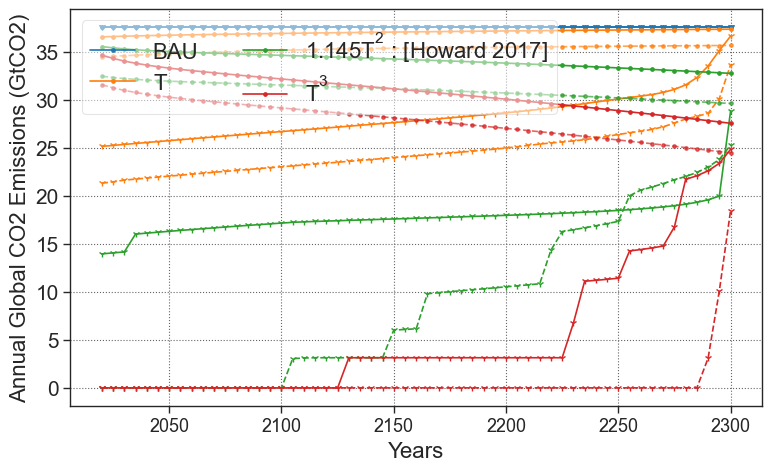

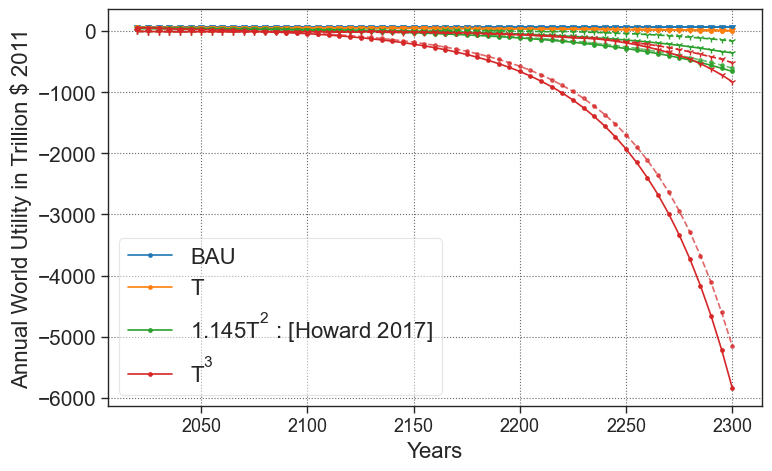

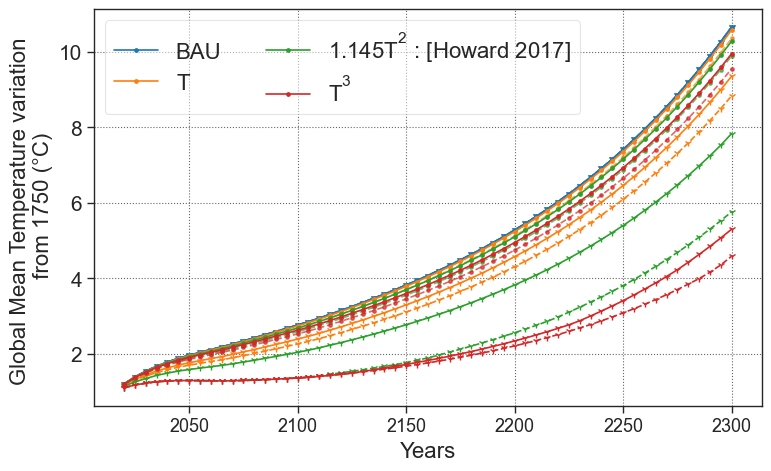

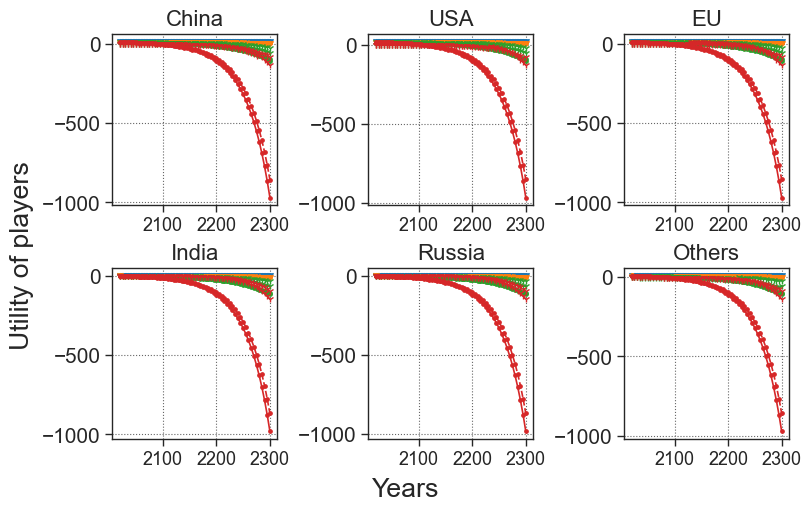

In [12]:
# puissance de la fonction damage 

# Coefficients de la fonction dammage (pour un polynome de degré 2)

list_damage_coef = [np.array([0]), np.array([0,1]), np.array([0,0,1.1450]), np.array([0,0,0,1])] #, np.array([0,0,0,0,1])]
list_damage_label = ['BAU', '$T$', '$1.145T^2$ : [Howard 2017]', '$T^3$'] #,  '$T^4$']

list_ne_u = []
list_so_u = []
list_ne_planning_u = []
list_so_planning_u = []
list_sum_action = []
list_sum_utilities = []
list_temp = []
list_sum_action_so = []
list_sum_utilities_so = []
list_temp_so = []
list_sum_action_planning = []
list_sum_utilities_planning = []
list_temp_planning = []
list_sum_action_planning_so = []
list_sum_utilities_planning_so = []
list_temp_planning_so = []
for damage_coef in list_damage_coef :
    list_players = create_players(list_benefit_functions=BENEFITS_SIGMOID,  damage_function=damage_polynome(damage_coef), discount=1)

    game = Game(list_players, horizon=2300)
    

    X = 2020 + np.arange(game.T)*5
    game.repeated_one_shot_game_NE()
    game.reset()

    game.repeated_one_shot_game_SO()
    game.reset()
    
    game.planning_BRD()
    game.planning_SO()

    list_ne_u.append(game.ne_u_p)
    list_ne_planning_u.append(game.ne_u_planning_brd)
    list_so_u.append(game.so_u_p)
    list_so_planning_u.append(game.so_u_planning)
    list_sum_action.append(game.ne_sum_a_p)
    list_temp.append(game.ne_temp_p)
    list_sum_utilities.append(game.ne_sum_u_p)
    
    list_sum_action_so.append(game.so_sum_a_p)
    list_temp_so.append(game.so_temp_p)
    list_sum_utilities_so.append(game.so_sum_u_p)

    list_sum_action_planning.append(game.ne_sum_a_planning_brd)
    list_temp_planning.append(game.ne_temp_planning_brd)
    list_sum_utilities_planning.append(game.ne_sum_u_planning_brd)


    list_sum_action_planning_so.append(game.so_sum_a_planning)
    list_temp_planning_so.append(game.so_temp_planning)
    list_sum_utilities_planning_so.append(game.so_sum_u_planning)

plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_action[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_sum_action_so[idx], color= p[0].get_color(), ls='--', marker='.', alpha = 0.7)
    plt.plot(X, list_sum_action_planning[idx], color= p[0].get_color(),marker='1' )
    plt.plot(X, list_sum_action_planning_so[idx], color= p[0].get_color(),marker='1', ls='--' )

plt.ylabel('Annual Global CO2 Emissions (GtCO2)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
plt.savefig(fname="plots_paper/Annual_Global_CO2_Emission_planning_sigmoid_{}.pdf".format(game.horizon), format='pdf')
plt.show()

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_utilities[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_sum_utilities_so[idx], color= p[0].get_color(), ls='--', marker='.', alpha = 0.7)
    plt.plot(X, list_sum_utilities_planning[idx], color= p[0].get_color(),marker='1' )
    plt.plot(X, list_sum_utilities_planning_so[idx], color= p[0].get_color(),marker='1',ls='--' )

plt.ylabel('Annual World Utility in Trillion $ 2011')
plt.xlabel('Years')
plt.legend(fancybox=True, framealpha=0.5)
plt.savefig(fname="plots_paper/Annual_World_Utility_planning_sigmoid_{}.pdf".format(game.horizon), format='pdf')
plt.show()




plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_temp[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_temp_so[idx], color= p[0].get_color(), ls='--',marker='.',  alpha = 0.7)
    plt.plot(X, list_temp_planning[idx], color= p[0].get_color(),marker='1')
    plt.plot(X, list_temp_planning_so[idx], color= p[0].get_color(),marker='1', ls='--')


plt.ylabel('Global Mean Temperature variation \n from 1750 (°C)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
plt.savefig(fname="plots_paper/Global_Mean_Temperature_planning_sigmoid_{}.pdf".format(game.horizon), format='pdf')
plt.show()


fig, axes = plt.subplots(2, 3, dpi = 100, figsize=(8,5), constrained_layout=True)

for k in range(N):
    for ne_u, so_u, ne_planning_u, so_planning_u in zip(list_ne_u, list_so_u, list_ne_planning_u, list_so_planning_u ):
        p = axes[k//3, k%3].plot(X, ne_u[k], marker='.')
        axes[k//3, k%3].plot(X, so_u[k], color=p[0].get_color(), marker='.', ls='--')
        axes[k//3, k%3].plot(X, ne_planning_u[k],color=p[0].get_color(), marker = '1')
        axes[k//3, k%3].plot(X, so_planning_u[k],color=p[0].get_color(), marker = '1', ls ='--')
        axes[k//3, k%3].set_title('{}'.format(NAMES[k]))

fig.supylabel('Utility of players')
fig.supxlabel('Years')

plt.savefig(fname="plots_paper/Utilities_OS_planning_sigmoid_{}.pdf".format(game.horizon), format='pdf')
plt.show()

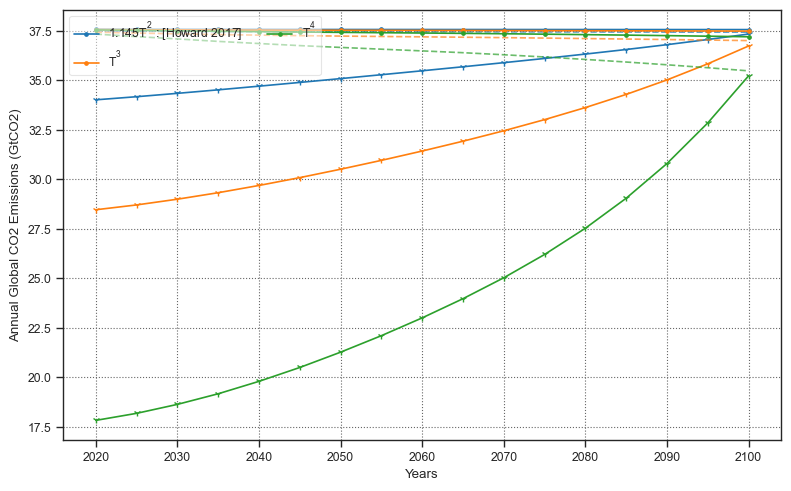

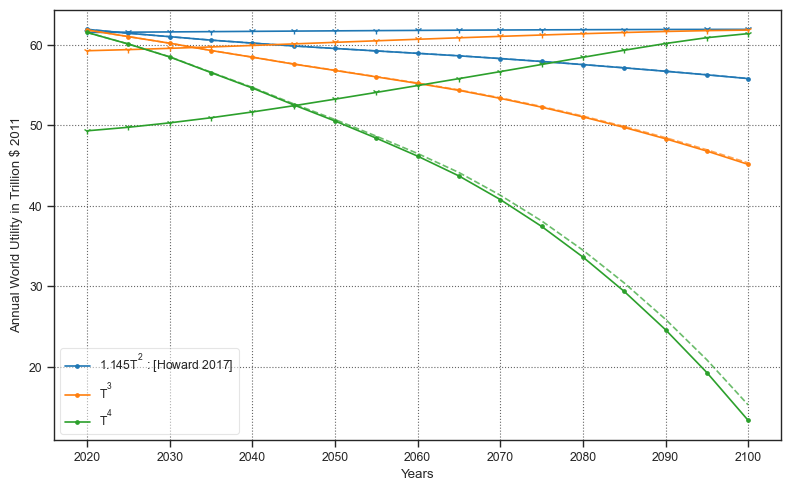

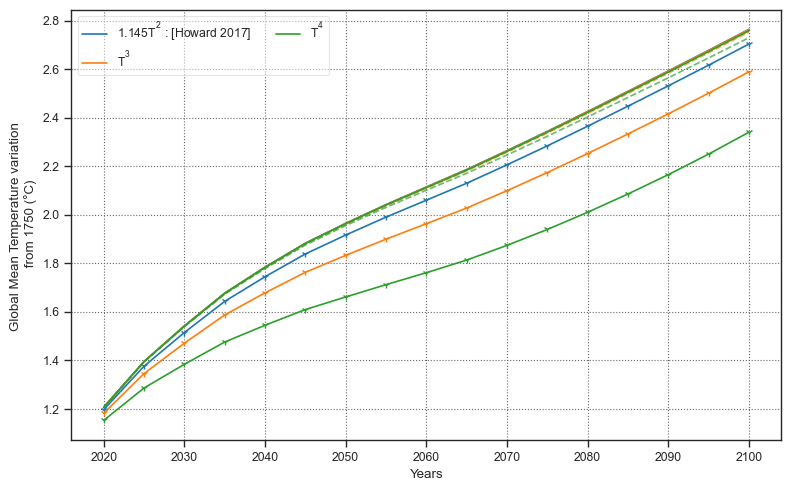

In [ ]:
# puissance de la fonction damage 

# Coefficients de la fonction dammage (pour un polynome de degré 2)

list_damage_coef = [np.array([0,0,1.1450]), np.array([0,0,0,1]), np.array([0,0,0,0,1])]
list_damage_label = ['$1.145T^2$ : [Howard 2017]', '$T^3$',  '$T^4$']

list_sum_action = []
list_sum_utilities = []
list_temp = []
list_sum_action_so = []
list_sum_utilities_so = []
list_temp_so = []
list_sum_action_planning = []
list_sum_utilities_planning = []
list_temp_planning = []
for damage_coef in list_damage_coef :
    list_players = create_players(list_benefit_functions=BENEFITS_CONCAVE,  damage_function=damage_polynome(damage_coef), discount=1)

    game = Game(list_players)

    X = 2020 + np.arange(game.T)*5

    game.repeated_one_shot_game_NE()
    game.repeated_one_shot_game_SO()
    game.reset()
    game.planning_BRD()

    list_sum_action.append(game.ne_sum_a_p)
    list_temp.append(game.ne_temp_p)
    list_sum_utilities.append(game.ne_sum_u_p)
    
    list_sum_action_so.append(game.so_sum_a_p)
    list_temp_so.append(game.so_temp_p)
    list_sum_utilities_so.append(game.so_sum_u_p)

    list_sum_action_planning.append(game.ne_sum_a_planning_brd)
    list_temp_planning.append(game.ne_temp_planning_brd)
    list_sum_utilities_planning.append(game.ne_sum_u_val_planning_brd)


plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_action[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_sum_action_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)
    plt.plot(X, list_sum_action_planning[idx], color= p[0].get_color(),marker='1' )

# plt.plot(X[:len(RCP_26)], RCP_26, label="RCP - 2.6", marker="*", color='green', alpha = 0.7)
# plt.plot(X[:len(RCP_26)], RCP_85, label="RCP - 8.5",marker="*", color='red', alpha = 0.7)
# plt.plot(X[:len(RCP_26)], RCP_60, label="RCP - 6.0",marker="*", color='blue', alpha = 0.7)
plt.ylabel('Annual Global CO2 Emissions (GtCO2)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
# plt.savefig(fname="Annual_Global_CO2_Emission_sigmoid_RCP.pdf", format='pdf')
plt.show()

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_utilities[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_sum_utilities_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)
    plt.plot(X, list_sum_utilities_planning[idx], color= p[0].get_color(),marker='1' )

plt.ylabel('Annual World Utility in Trillion $ 2011')
plt.xlabel('Years')
plt.legend(fancybox=True, framealpha=0.5)
# plt.savefig(fname="Annual_World_Utility_sigmoid.pdf", format='pdf')
plt.show()




plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_temp[idx], label=list_damage_label[idx])
    plt.plot(X, list_temp_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)
    plt.plot(X, list_temp_planning[idx], color= p[0].get_color(),marker='1')
# plt.plot(X, temp_RCP26, label="RCP - 2.6", marker="*", color='green', alpha = 0.7)
# plt.plot(X, temp_RCP85, label="RCP - 8.5",marker="*", color='red', alpha = 0.7)
# plt.plot(X, temp_RCP60, label="RCP - 6.0",marker="*", color='blue', alpha = 0.7)

plt.ylabel('Global Mean Temperature variation \n from 1750 (°C)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
# plt.savefig(fname="Global_Mean_Temperature_sigmoid_RCP.pdf", format='pdf')
plt.show()

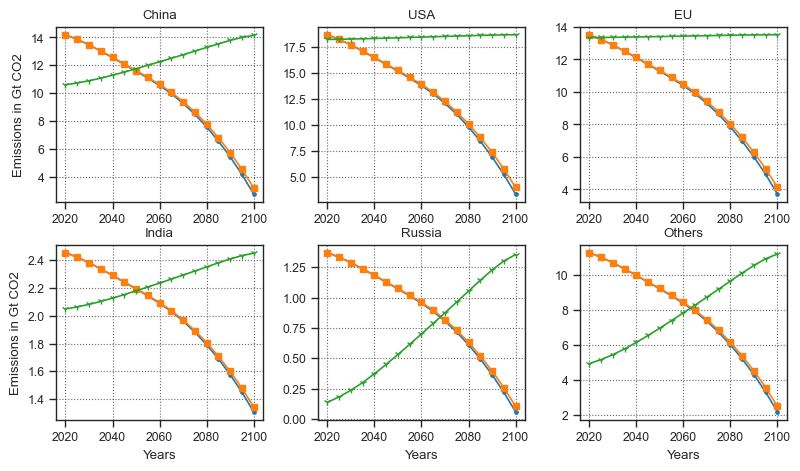

In [ ]:
fig, axes = plt.subplots(2, 3, dpi = 100, figsize=(8,4.5))
fig.tight_layout()
for k in range(N):

    axes[k//3, k%3].plot(X, game.ne_u_p[k], marker='.')
    axes[k//3, k%3].plot(X, game.so_u_p[k], marker='s')
    axes[k//3, k%3].plot(X, game.ne_u_val_planning_brd[k], marker = '1')
    axes[k//3, k%3].set_title('{}'.format(NAMES[k]))
    # axes[k//3, k%3].set_ylim(bottom=-0.2,top=ACTION_SETS[k,1]*1.05, auto=True)

    if k%3==0:
        axes[k//3, k%3].set_ylabel('Emissions in Gt CO2')
    if k//3 ==1:
        axes[k//3, k%3].set_xlabel('Years')
 

# 2200

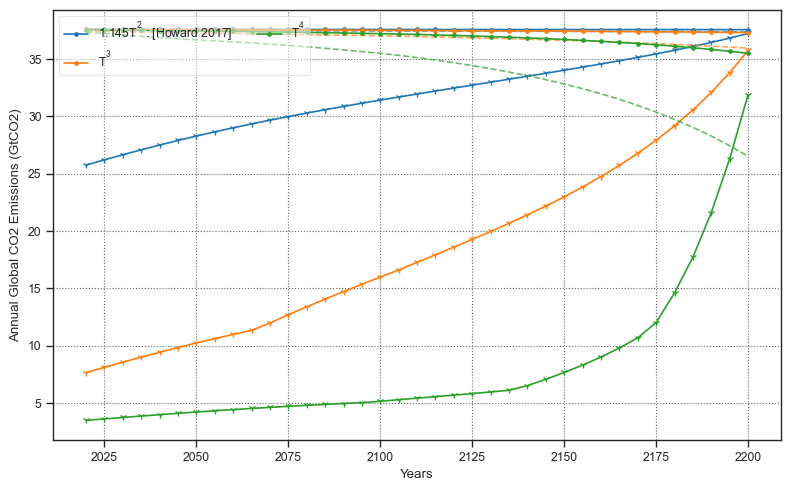

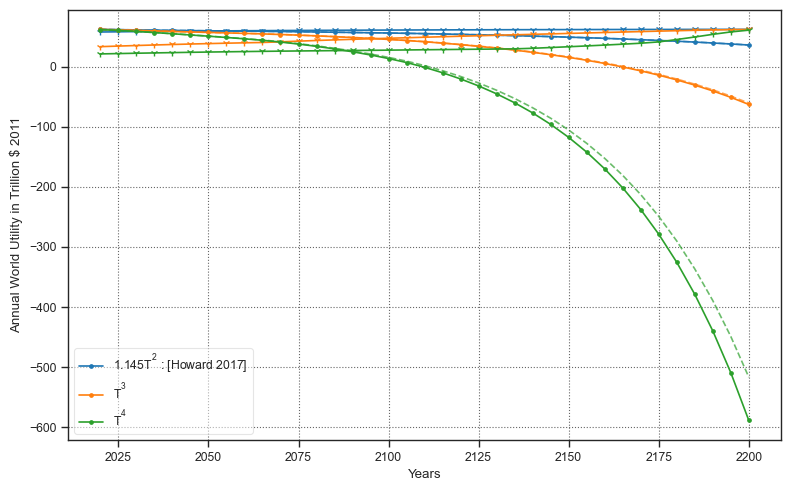

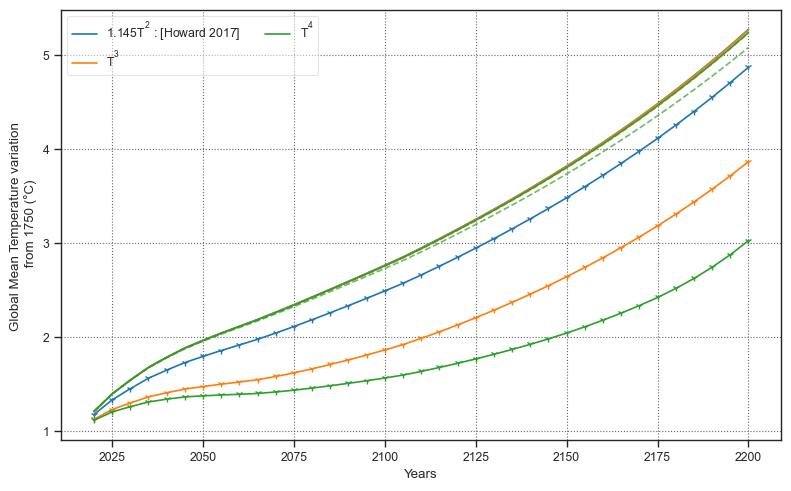

In [10]:
# puissance de la fonction damage 

# Coefficients de la fonction dammage (pour un polynome de degré 2)

list_damage_coef = [np.array([0,0,1.1450]), np.array([0,0,0,1]), np.array([0,0,0,0,1])]
list_damage_label = ['$1.145T^2$ : [Howard 2017]', '$T^3$',  '$T^4$']

list_sum_action = []
list_sum_utilities = []
list_temp = []
list_sum_action_so = []
list_sum_utilities_so = []
list_temp_so = []
list_sum_action_planning = []
list_sum_utilities_planning = []
list_temp_planning = []
for damage_coef in list_damage_coef :
    list_players = create_players(list_benefit_functions=BENEFITS_CONCAVE,  damage_function=damage_polynome(damage_coef), discount=1)

    game = Game(list_players)

    X = 2020 + np.arange(game.T)*5

    game.repeated_one_shot_game_NE()
    game.repeated_one_shot_game_SO()
    game.reset()
    game.planning_BRD()

    list_sum_action.append(game.ne_sum_a_p)
    list_temp.append(game.ne_temp_p)
    list_sum_utilities.append(game.ne_sum_u_p)
    
    list_sum_action_so.append(game.so_sum_a_p)
    list_temp_so.append(game.so_temp_p)
    list_sum_utilities_so.append(game.so_sum_u_p)

    list_sum_action_planning.append(game.ne_sum_a_planning_brd)
    list_temp_planning.append(game.ne_temp_planning_brd)
    list_sum_utilities_planning.append(game.ne_sum_u_val_planning_brd)


plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_action[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_sum_action_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)
    plt.plot(X, list_sum_action_planning[idx], color= p[0].get_color(),marker='1' )

# plt.plot(X[:len(RCP_26)], RCP_26, label="RCP - 2.6", marker="*", color='green', alpha = 0.7)
# plt.plot(X[:len(RCP_26)], RCP_85, label="RCP - 8.5",marker="*", color='red', alpha = 0.7)
# plt.plot(X[:len(RCP_26)], RCP_60, label="RCP - 6.0",marker="*", color='blue', alpha = 0.7)
plt.ylabel('Annual Global CO2 Emissions (GtCO2)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
# plt.savefig(fname="Annual_Global_CO2_Emission_sigmoid_RCP.pdf", format='pdf')
plt.show()

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_utilities[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_sum_utilities_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)
    plt.plot(X, list_sum_utilities_planning[idx], color= p[0].get_color(),marker='1' )

plt.ylabel('Annual World Utility in Trillion $ 2011')
plt.xlabel('Years')
plt.legend(fancybox=True, framealpha=0.5)
# plt.savefig(fname="Annual_World_Utility_sigmoid.pdf", format='pdf')
plt.show()




plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_temp[idx], label=list_damage_label[idx])
    plt.plot(X, list_temp_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)
    plt.plot(X, list_temp_planning[idx], color= p[0].get_color(),marker='1')
# plt.plot(X, temp_RCP26, label="RCP - 2.6", marker="*", color='green', alpha = 0.7)
# plt.plot(X, temp_RCP85, label="RCP - 8.5",marker="*", color='red', alpha = 0.7)
# plt.plot(X, temp_RCP60, label="RCP - 6.0",marker="*", color='blue', alpha = 0.7)

plt.ylabel('Global Mean Temperature variation \n from 1750 (°C)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
# plt.savefig(fname="Global_Mean_Temperature_sigmoid_RCP.pdf", format='pdf')
plt.show()

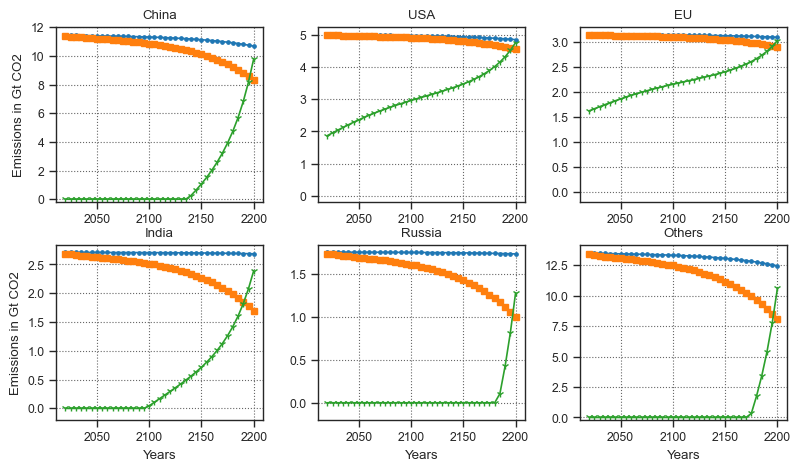

In [ ]:
fig, axes = plt.subplots(2, 3, dpi = 100, figsize=(8,4.5))
fig.tight_layout()
for k in range(N):

    axes[k//3, k%3].plot(X, game.ne_a_p[k], marker='.')
    axes[k//3, k%3].plot(X, game.so_a_p[k], marker='s')
    axes[k//3, k%3].plot(X, game.ne_a_planning_brd[k], marker = '1')
    axes[k//3, k%3].set_title('{}'.format(NAMES[k]))
    axes[k//3, k%3].set_ylim(bottom=-0.2,top=ACTION_SETS[k,1]*1.05, auto=True)

    if k%3==0:
        axes[k//3, k%3].set_ylabel('Emissions in Gt CO2')
    if k//3 ==1:
        axes[k//3, k%3].set_xlabel('Years')
 

# 2500

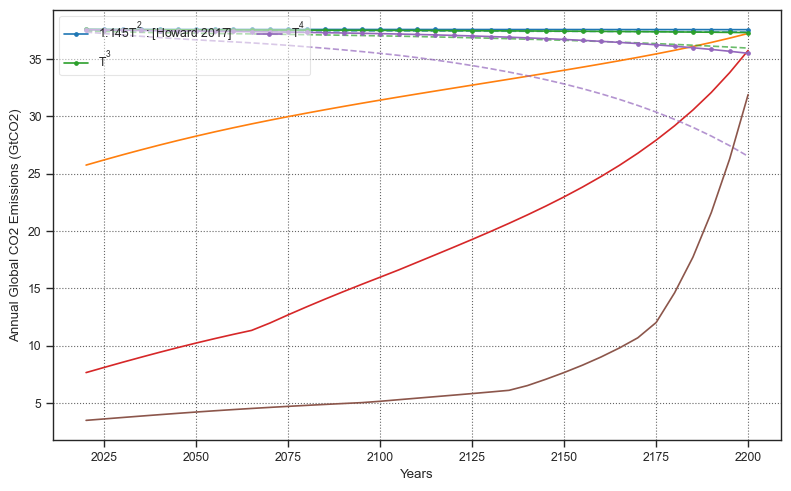

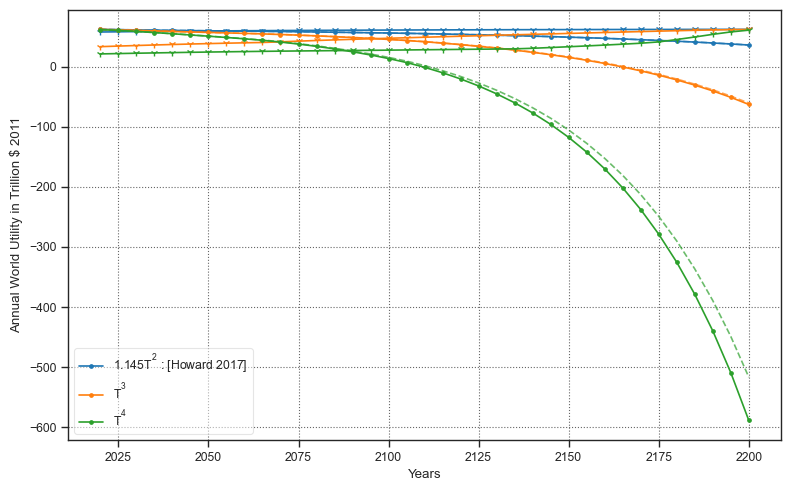

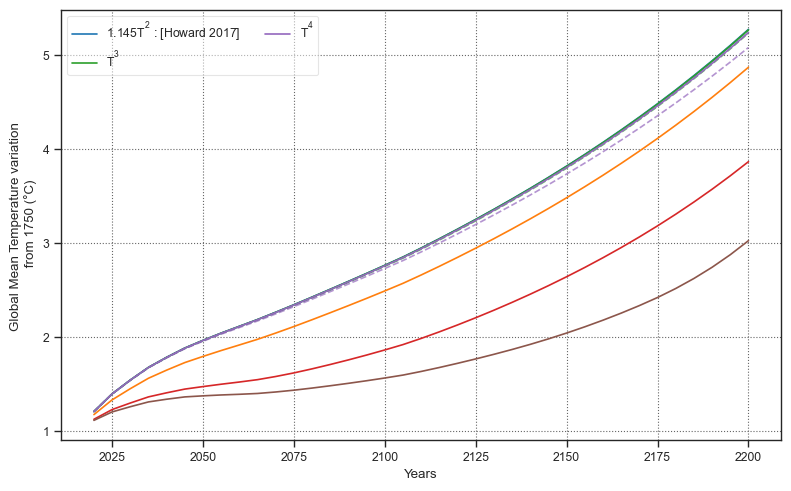

In [11]:
# puissance de la fonction damage 

# Coefficients de la fonction dammage (pour un polynome de degré 2)

list_damage_coef = [np.array([0,0,1.1450]), np.array([0,0,0,1]), np.array([0,0,0,0,1])]
list_damage_label = ['$1.145T^2$ : [Howard 2017]', '$T^3$',  '$T^4$']

list_sum_action = []
list_sum_utilities = []
list_temp = []
list_sum_action_so = []
list_sum_utilities_so = []
list_temp_so = []
list_sum_action_planning = []
list_sum_utilities_planning = []
list_temp_planning = []
for damage_coef in list_damage_coef :
    list_players = create_players(list_benefit_functions=BENEFITS_CONCAVE,  damage_function=damage_polynome(damage_coef), discount=1)

    game = Game(list_players)

    X = 2020 + np.arange(game.T)*5

    game.repeated_one_shot_game_NE()
    game.repeated_one_shot_game_SO()
    game.reset()
    game.planning_BRD()

    list_sum_action.append(game.ne_sum_a_p)
    list_temp.append(game.ne_temp_p)
    list_sum_utilities.append(game.ne_sum_u_p)
    
    list_sum_action_so.append(game.so_sum_a_p)
    list_temp_so.append(game.so_temp_p)
    list_sum_utilities_so.append(game.so_sum_u_p)

    list_sum_action_planning.append(game.ne_sum_a_planning_brd)
    list_temp_planning.append(game.ne_temp_planning_brd)
    list_sum_utilities_planning.append(game.ne_sum_u_val_planning_brd)


plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_action[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_sum_action_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)
    plt.plot(X, list_sum_action_planning[idx])

# plt.plot(X[:len(RCP_26)], RCP_26, label="RCP - 2.6", marker="*", color='green', alpha = 0.7)
# plt.plot(X[:len(RCP_26)], RCP_85, label="RCP - 8.5",marker="*", color='red', alpha = 0.7)
# plt.plot(X[:len(RCP_26)], RCP_60, label="RCP - 6.0",marker="*", color='blue', alpha = 0.7)
plt.ylabel('Annual Global CO2 Emissions (GtCO2)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
# plt.savefig(fname="Annual_Global_CO2_Emission_sigmoid_RCP.pdf", format='pdf')
plt.show()

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_utilities[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_sum_utilities_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)
    plt.plot(X, list_sum_utilities_planning[idx], color= p[0].get_color(),marker='1' )

plt.ylabel('Annual World Utility in Trillion $ 2011')
plt.xlabel('Years')
plt.legend(fancybox=True, framealpha=0.5)
# plt.savefig(fname="Annual_World_Utility_sigmoid.pdf", format='pdf')
plt.show()




plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_temp[idx], label=list_damage_label[idx])
    plt.plot(X, list_temp_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)
    plt.plot(X, list_temp_planning[idx])
# plt.plot(X, temp_RCP26, label="RCP - 2.6", marker="*", color='green', alpha = 0.7)
# plt.plot(X, temp_RCP85, label="RCP - 8.5",marker="*", color='red', alpha = 0.7)
# plt.plot(X, temp_RCP60, label="RCP - 6.0",marker="*", color='blue', alpha = 0.7)

plt.ylabel('Global Mean Temperature variation \n from 1750 (°C)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
# plt.savefig(fname="Global_Mean_Temperature_sigmoid_RCP.pdf", format='pdf')
plt.show()

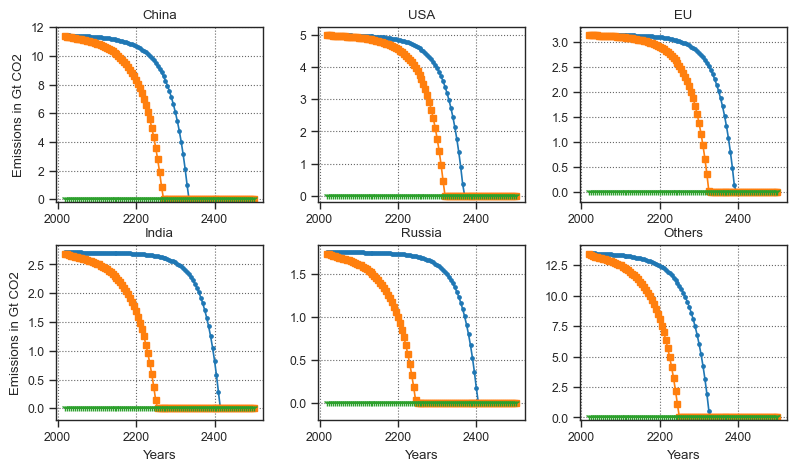

In [6]:
fig, axes = plt.subplots(2, 3, dpi = 100, figsize=(8,4.5))
fig.tight_layout()
for k in range(N):

    axes[k//3, k%3].plot(X, game.ne_a_p[k], marker='.')
    axes[k//3, k%3].plot(X, game.so_a_p[k], marker='s')
    axes[k//3, k%3].plot(X, game.ne_a_planning_brd[k], marker = '1')
    axes[k//3, k%3].set_title('{}'.format(NAMES[k]))
    axes[k//3, k%3].set_ylim(bottom=-0.2,top=ACTION_SETS[k,1]*1.05, auto=True)

    if k%3==0:
        axes[k//3, k%3].set_ylabel('Emissions in Gt CO2')
    if k//3 ==1:
        axes[k//3, k%3].set_xlabel('Years')
 

In [47]:
game.ne_a_p[1]

array([5.00999636, 5.00999636, 5.00999636, 5.00999636, 5.00999636,
       5.00999636, 5.00999636, 5.00999636, 5.00999636, 5.00999636,
       5.00999636, 5.00999636, 5.00999636, 5.00999636, 5.00999636,
       5.00999636, 5.00999636, 5.00999636, 5.00999636, 5.00999636,
       5.00999636, 5.00999636, 5.00999636, 5.00999636, 5.00999636,
       5.00999636, 5.00999636])

!
!
!
!
!
!
!
!
!
!
!
!
!


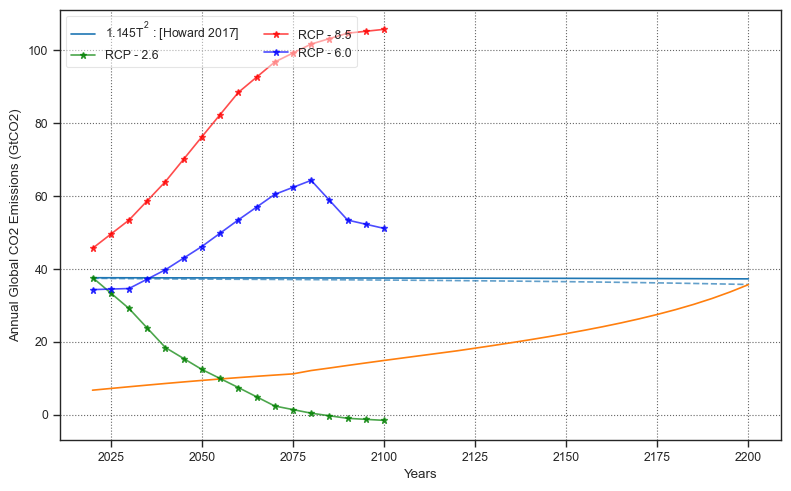

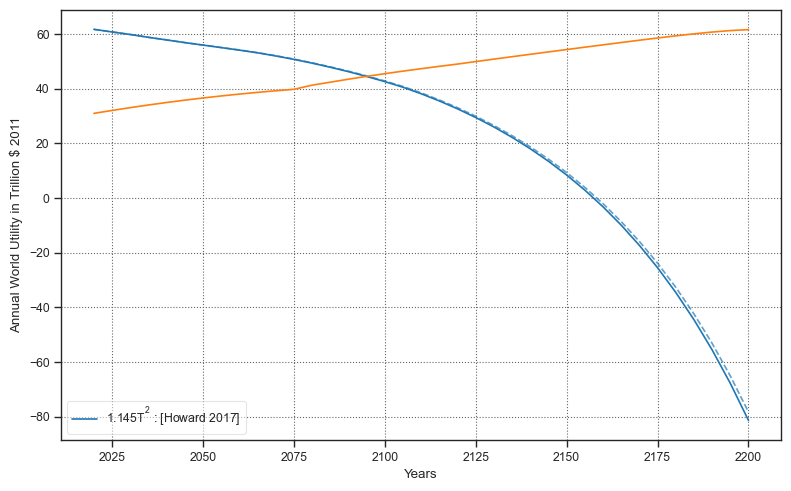

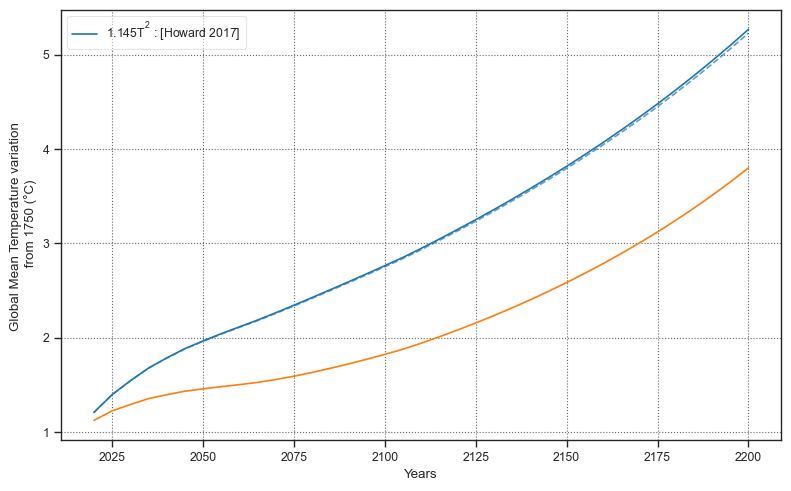

In [5]:
# puissance de la fonction damage 

# Coefficients de la fonction dammage (pour un polynome de degré 2)

list_damage_coef = [np.array([0,0,0,1.1450])]
list_damage_label = ['$1.145T^2$ : [Howard 2017]']

list_sum_action = []
list_sum_utilities = []
list_temp = []
list_sum_action_so = []
list_sum_utilities_so = []
list_temp_so = []
list_sum_action_planning = []
list_sum_utilities_planning = []
list_temp_planning = []
for damage_coef in list_damage_coef :
    list_players = create_players(list_benefit_functions=BENEFITS_CONCAVE,  damage_function=damage_polynome(damage_coef), discount=0.99)

    game = Game(list_players)

    X = 2020 + np.arange(game.T)*5

    game.repeated_one_shot_game_NE()
    game.repeated_one_shot_game_SO()
    game.reset()
    game.planning_BRD()

    list_sum_action.append(game.ne_sum_a_p)
    list_temp.append(game.ne_temp_p)
    list_sum_utilities.append(game.ne_sum_u_p)
    
    list_sum_action_so.append(game.so_sum_a_p)
    list_temp_so.append(game.so_temp_p)
    list_sum_utilities_so.append(game.so_sum_u_p)

    list_sum_action_planning.append(game.ne_sum_a_planning_brd)
    list_temp_planning.append(game.ne_temp_planning_brd)
    list_sum_utilities_planning.append(game.ne_sum_u_val_planning_brd)


plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_action[idx], label=list_damage_label[idx])
    plt.plot(X, list_sum_action_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)
    plt.plot(X, list_sum_action_planning[idx])

plt.plot(X[:len(RCP_26)], RCP_26, label="RCP - 2.6", marker="*", color='green', alpha = 0.7)
plt.plot(X[:len(RCP_26)], RCP_85, label="RCP - 8.5",marker="*", color='red', alpha = 0.7)
plt.plot(X[:len(RCP_26)], RCP_60, label="RCP - 6.0",marker="*", color='blue', alpha = 0.7)
plt.ylabel('Annual Global CO2 Emissions (GtCO2)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
# plt.savefig(fname="Annual_Global_CO2_Emission_sigmoid_RCP.pdf", format='pdf')
plt.show()

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_utilities[idx], label=list_damage_label[idx])
    plt.plot(X, list_sum_utilities_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)
    plt.plot(X, list_sum_utilities_planning[idx])

plt.ylabel('Annual World Utility in Trillion $ 2011')
plt.xlabel('Years')
plt.legend(fancybox=True, framealpha=0.5)
# plt.savefig(fname="Annual_World_Utility_sigmoid.pdf", format='pdf')
plt.show()




plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_temp[idx], label=list_damage_label[idx])
    plt.plot(X, list_temp_so[idx], color= p[0].get_color(), ls='--', alpha = 0.7)
    plt.plot(X, list_temp_planning[idx])
# plt.plot(X, temp_RCP26, label="RCP - 2.6", marker="*", color='green', alpha = 0.7)
# plt.plot(X, temp_RCP85, label="RCP - 8.5",marker="*", color='red', alpha = 0.7)
# plt.plot(X, temp_RCP60, label="RCP - 6.0",marker="*", color='blue', alpha = 0.7)

plt.ylabel('Global Mean Temperature variation \n from 1750 (°C)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
# plt.savefig(fname="Global_Mean_Temperature_sigmoid_RCP.pdf", format='pdf')
plt.show()

In [1]:
import numpy as np 
from scipy.optimize import *

import matplotlib.pyplot as plt
import seaborn as sns

from parameters import *
from models.game_theory_model import *
from models.game import *
from plot_function import *

sns.set_style('ticks',  {"axes.grid" : "True", "grid.color": ".4", "grid.linestyle": ":"})
sns.set_context('paper')
plt.rcParams.update({'mathtext.default':  'regular' })
plt.rcParams['xtick.direction'] = 'out'
figsize = (8,5)

In [2]:
import pandas as pd

data = pd.read_csv('data/rcp_data.csv')
RCP_26 = data.loc[data['Scenario'] == 'RCP-2.6'].to_numpy()[0][8:] * co2_to_C**-1
RCP_85 = data.loc[data['Scenario'] == 'RCP-8.5'].to_numpy()[0][8:] * co2_to_C**-1
RCP_60 = data.loc[data['Scenario'] == 'RCP-6.0'].to_numpy()[0][8:] * co2_to_C**-1

temp_RCP26 = SCM.evaluate_trajectory(RCP_26)[-1]
temp_RCP85 = SCM.evaluate_trajectory(RCP_85)[-1]
temp_RCP60 = SCM.evaluate_trajectory(RCP_60)[-1]

True


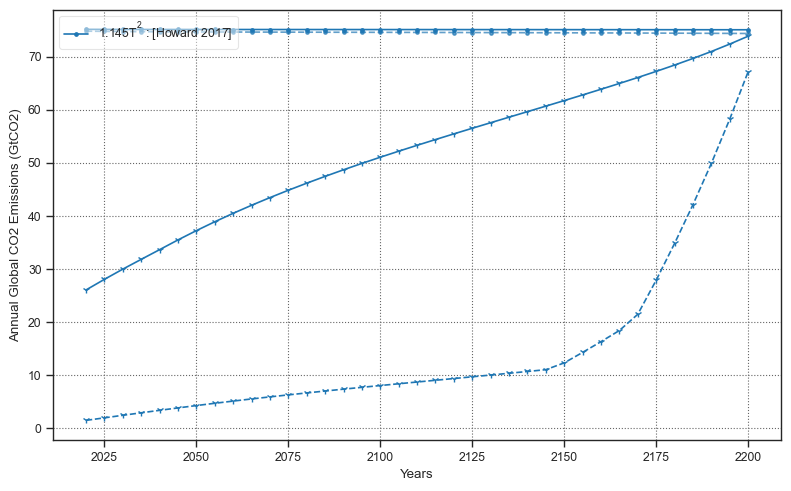

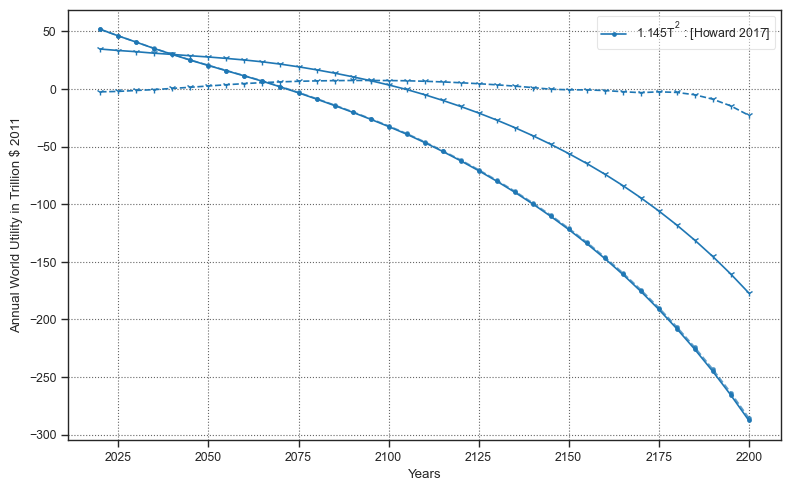

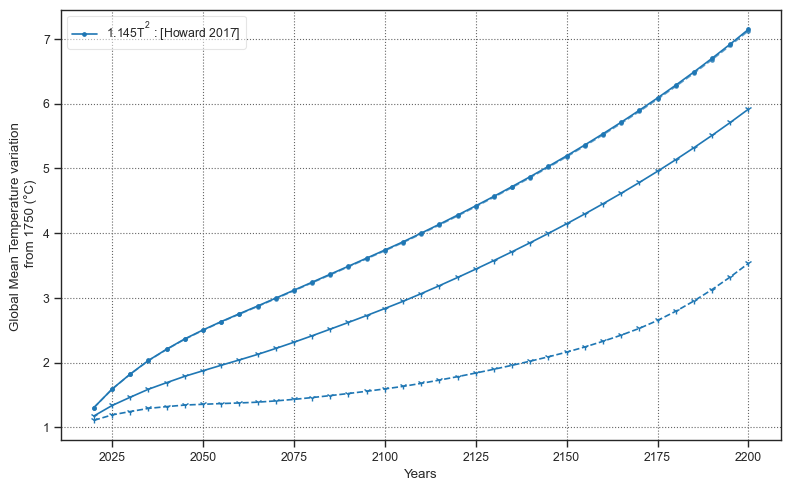

In [3]:
# puissance de la fonction damage 

# Coefficients de la fonction dammage (pour un polynome de degré 2)

list_damage_coef = [np.array([0,0,1.1450])] #, np.array([0,0,0,.85])] #, np.array([0,0,0,0,1])]
list_damage_label = ['$1.145T^2$ : [Howard 2017]'] #, '$T^3$'] #,  '$T^4$']

list_sum_action = []
list_sum_utilities = []
list_temp = []
list_sum_action_so = []
list_sum_utilities_so = []
list_temp_so = []
list_sum_action_planning = []
list_sum_utilities_planning = []
list_temp_planning = []
list_sum_action_planning_so = []
list_sum_utilities_planning_so = []
list_temp_planning_so = []
for damage_coef in list_damage_coef :
    list_players = create_players(list_benefit_functions=BENEFITS_CONCAVE,  damage_function=damage_polynome(damage_coef), discount=1)

    game = Game(list_players)

    X = 2020 + np.arange(game.T)*5


    game.reset()
    game.planning_BRD()
    game.reset()
    # game.planning_gradient_descent()
    game.reset()

    game.planning_SO()
    game.repeated_one_shot_game_NE()
    game.repeated_one_shot_game_SO()

    list_sum_action.append(game.ne_sum_a_p)
    list_temp.append(game.ne_temp_p)
    list_sum_utilities.append(game.ne_sum_u_p)
    
    list_sum_action_so.append(game.so_sum_a_p)
    list_temp_so.append(game.so_temp_p)
    list_sum_utilities_so.append(game.so_sum_u_p)

    list_sum_action_planning.append(game.ne_sum_a_planning_brd)
    list_temp_planning.append(game.ne_temp_planning_brd)
    list_sum_utilities_planning.append(game.ne_sum_u_planning_brd)

    # list_sum_action_planning.append(game.ne_sum_a_planning_gd)
    # list_temp_planning.append(game.ne_temp_planning_gd)
    # list_sum_utilities_planning.append(game.ne_sum_u_planning_gd)

    list_sum_action_planning_so.append(game.so_sum_a_planning)
    list_temp_planning_so.append(game.so_temp_planning)
    list_sum_utilities_planning_so.append(game.so_sum_u_planning)


plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_action[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_sum_action_so[idx], color= p[0].get_color(), ls='--', marker='.', alpha = 0.7)
    plt.plot(X, list_sum_action_planning[idx], color= p[0].get_color(),marker='1' )
    plt.plot(X, list_sum_action_planning_so[idx], color= p[0].get_color(),ls ='--', marker='1' )


# plt.plot(X[:len(RCP_26)], RCP_26, label="RCP - 2.6", marker="*", color='green', alpha = 0.7)
# plt.plot(X[:len(RCP_26)], RCP_85, label="RCP - 8.5",marker="*", color='red', alpha = 0.7)
# plt.plot(X[:len(RCP_26)], RCP_60, label="RCP - 6.0",marker="*", color='blue', alpha = 0.7)
plt.ylabel('Annual Global CO2 Emissions (GtCO2)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
# plt.savefig(fname="Annual_Global_CO2_Emission_sigmoid_RCP.pdf", format='pdf')
plt.show()

plt.figure(figsize=figsize, dpi=100, tight_layout=True)

for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_sum_utilities[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_sum_utilities_so[idx], color= p[0].get_color(), ls='--', marker='.', alpha = 0.7)
    plt.plot(X, list_sum_utilities_planning[idx], color= p[0].get_color(),marker='1' )
    plt.plot(X, list_sum_utilities_planning_so[idx], color= p[0].get_color(),ls ='--', marker='1' )

plt.ylabel('Annual World Utility in Trillion $ 2011')
plt.xlabel('Years')
plt.legend(fancybox=True, framealpha=0.5)
# plt.savefig(fname="Annual_World_Utility_sigmoid.pdf", format='pdf')
plt.show()




plt.figure(figsize=figsize, dpi=100, tight_layout=True)
for idx, damage_coef in enumerate(list_damage_coef) :   
    p = plt.plot(X, list_temp[idx], label=list_damage_label[idx], marker='.')
    plt.plot(X, list_temp_so[idx], color= p[0].get_color(), ls='--', marker='.', alpha = 0.7)
    plt.plot(X, list_temp_planning[idx], color= p[0].get_color(), marker='1')
    plt.plot(X, list_temp_planning_so[idx], color= p[0].get_color(), ls ='--', marker='1' )

# plt.plot(X, temp_RCP26, label="RCP - 2.6", marker="*", color='green', alpha = 0.7)
# plt.plot(X, temp_RCP85, label="RCP - 8.5",marker="*", color='red', alpha = 0.7)
# plt.plot(X, temp_RCP60, label="RCP - 6.0",marker="*", color='blue', alpha = 0.7)

plt.ylabel('Global Mean Temperature variation \n from 1750 (°C)')
plt.xlabel('Years')
plt.legend(ncol= 2,loc='upper left',fancybox=True, framealpha=0.5)
# plt.savefig(fname="Global_Mean_Temperature_sigmoid_RCP.pdf", format='pdf')
plt.show()

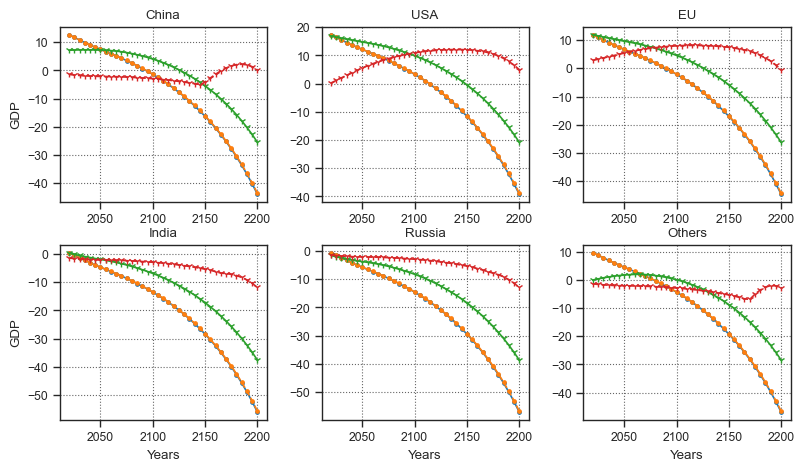

In [4]:
fig, axes = plt.subplots(2, 3, dpi = 100, figsize=(8,4.5))
fig.tight_layout()
for k in range(N):

    axes[k//3, k%3].plot(X, game.ne_u_p[k], marker='.')
    axes[k//3, k%3].plot(X, game.so_u_p[k], marker='.', ls ='--')
    axes[k//3, k%3].plot(X, game.ne_u_planning_brd[k], marker = '1')
    axes[k//3, k%3].plot(X, game.so_u_planning[k], ls = '--', marker = '1')

    axes[k//3, k%3].set_title('{}'.format(NAMES[k]))
    # axes[k//3, k%3].set_ylim(bottom=-0.2,top=ACTION_SETS[k,1]*1.05, auto=True)

    if k%3==0:
        axes[k//3, k%3].set_ylabel('GDP')
    if k//3 ==1:
        axes[k//3, k%3].set_xlabel('Years')

In [8]:
game.so_sum_u_planning

array([ -2.53358987,  -2.13918676,  -1.32959394,  -0.57619665,
         0.45370868,   1.4445447 ,   2.5728689 ,   3.62717612,
         4.62398055,   5.49367163,   6.1363977 ,   6.63136541,
         6.9776751 ,   7.20613788,   7.33325049,   7.35593727,
         7.27329112,   7.08440495,   6.65788537,   6.08193912,
         5.37520772,   4.53815866,   3.56591558,   2.45143301,
         1.18623089,  -0.23947544,  -0.74411515,  -0.83794192,
        -1.37725108,  -2.39433464,  -3.24306532,  -2.50165355,
        -3.00967283,  -5.07719132,  -8.89721091, -14.71957834,
       -22.88229054])

In [7]:
game.ne_sum_u_planning_brd

array([  34.59700139,   33.34156926,   32.28621555,   30.98556321,
         29.92743127,   28.77684709,   27.71329815,   26.4815541 ,
         25.11336879,   23.51011647,   21.50689366,   19.20684367,
         16.59594413,   13.71290321,   10.57647692,    7.17267858,
          3.49085504,   -0.48066132,   -4.99304292,   -9.9055197 ,
        -15.19707906,  -20.87905717,  -26.97275215,  -33.50439915,
        -40.50351936,  -48.00289915,  -56.03865367,  -64.65052605,
        -73.88229919,  -83.78212757,  -94.40286643, -105.8026613 ,
       -118.04548868, -131.20201642, -145.35077383, -160.57988358,
       -176.98693995])

In [5]:
sum_ = []
for idx,player in enumerate(game.list_players):
    sum_.append(player.utility_sum_over_t(game.ne_a_planning_brd[idx], game.ne_sum_a_planning_brd - game.ne_a_planning_brd[idx]))
print(sum_)
print(sum(sum_))

[-13122.676774793592, -13113.90616360864, -11751.018707141466, -7893.939150479122, -16009.420277546127, -13279.994430321967]
-75170.95550389092


In [6]:
sum_ = []
for idx,player in enumerate(game.list_players):
    sum_.append(player.utility_sum_over_t(game.so_a_planning[idx], game.so_sum_a_planning - game.so_a_planning[idx]))
print(sum_)
print(sum(sum_))

[-12202.060615531149, -12004.781381205506, -10695.283096622785, -7204.99610051566, -14502.087794048313, -12253.314353941125]
-68862.52334186454


In [13]:
game.list_players[0].damage_function(temp=game.so_temp_planning)

array([ 1.53940604,  2.10979526,  2.53840388,  2.98811743,  3.27396466,
        3.53790774,  3.67627264,  3.8018545 ,  3.90747164,  4.03691184,
        4.28833762,  4.63533436,  5.09764174,  5.7382012 ,  6.6763471 ,
        8.0420846 , 10.02080222])

In [14]:
game.list_players[0].damage_function(temp=None, sum_action=game.so_sum_a_planning)

AttributeError: 'NoneType' object has no attribute 'five_years_atmospheric_temp'